In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [51]:
# Position History path
path_name = "D:\\PlotData1012\\Result\\"
# file_name = "NoControl.csv"
# file_name = "AtStationControl.csv"
# file_name = "InterStationControl.csv"
# file_name = "JointControl.csv"
file_name = "RealWorld.csv"
path = path_name + file_name
df_1 = pd.read_csv(path).iloc[:,:100]

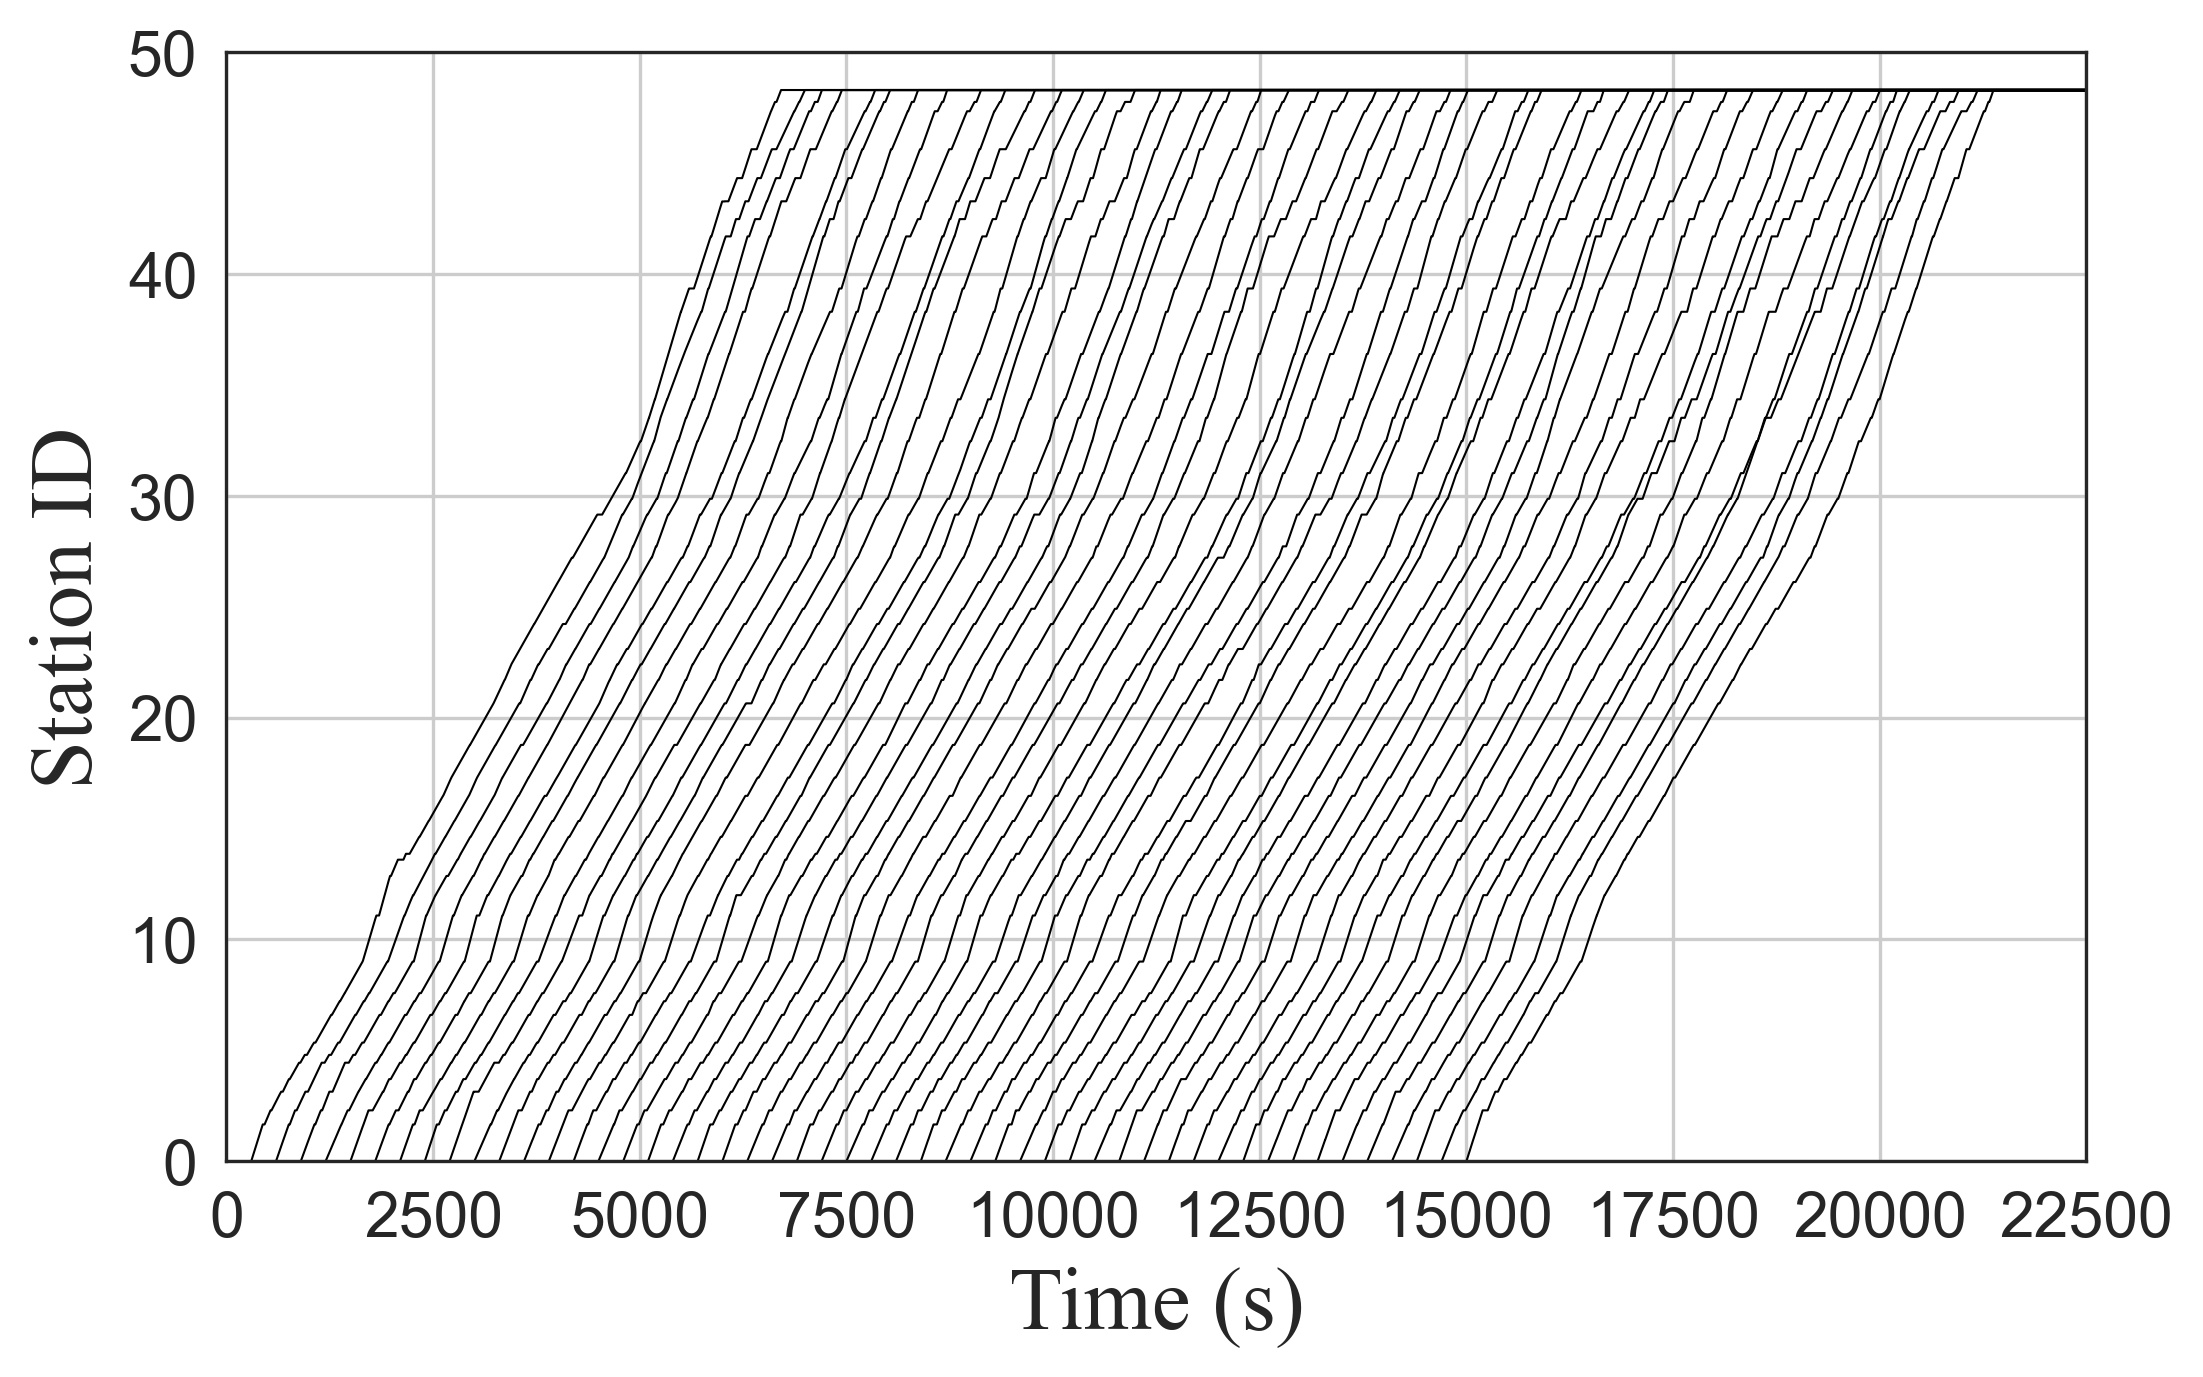

In [52]:
fig = plt.figure(figsize=(8,4.8),dpi=300)
sns.set_style('white')
plt.grid(True)  # 显示网格
plt.xlim(0,22000)
plt.ylim(0,50);
plt.xticks(np.arange(0,22501,2500),size=15)
plt.yticks(np.arange(0,51,10),size=15)
for i in range(1,51) :
    plt.plot( range(df_1.shape[0]), df_1.iloc[0:,i]/1000 , linewidth=0.5 ,color = "black")

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 21,
}
plt.xlabel("Time (s)", font)
plt.ylabel("Station ID", font)
plt.show()  # 显示图片

In [54]:
path_name = "D:\\OneDrive\\2. 研究\\2.1 研究课题\\2.1.1 公交车运行优化\\ReReTex\\code\\RealBusData\\"
arrive = "368内-20230321-ArrivalNew.csv"
depart = "368内-20230321-DepartureNew.csv"
df_arrive = pd.read_csv(path_name + arrive , index_col=0)
df_depart = pd.read_csv(path_name + depart , index_col=0)

In [59]:
station_position = [
            0,  957, 1654, 2289, 3131, 3698, 4438, 4791, 5344, 6595,
         7211, 7574, 8998,11075,11993,12859,13593,13858,14623,15338,
        16472,17296,18769,20642,21699,22402,23094,24221,24907,26113,
        27211,27722,29155,29867,31025,32463,33519,34353,36397,38300,
        39350,41699,42479,43282,44327,45631,47343,47764,48300]

In [4]:
time_list = []
position_list = []

for bus in range(123):
    time = []
    position = []
    for i in range(47):
        time.append(df_depart.iloc[bus,i])
        position.append(station_position[i])
        time.append(df_arrive.iloc[bus,i+1])
        position.append(station_position[i+1])
    time_list.append(time)
    position_list.append(position)

In [43]:
df_A = df_arrive.iloc[1:,1:48].reset_index(drop=True)
df_D = df_depart.iloc[:122,1:48].reset_index(drop=True)

In [93]:
list_interval = []
for i in range(47):
    arrival_time_list = df_A.iloc[:,i].tolist()
    arrival_time_list.sort()
    departure_time_list = df_D.iloc[:,i].tolist()
    departure_time_list.sort()
    list_interval.append(np.array(arrival_time_list)-np.array(departure_time_list))
df_interval = pd.DataFrame(list_interval).T

In [77]:
def Expected_avg_PBR (interval:int):
    return np.exp(-0.001*interval/2)

In [89]:
arrival_rate = np.array(
               [0.0240,	0.0310,	0.0226,	0.0389,	0.0349,	0.0245,	0.0238,	0.0355,	0.0673,	0.0210,	0.0347,
                0.0390,	0.0397,	0.0291, 0.0376, 0.0375, 0.0404, 0.0333, 0.0424, 0.0372, 0.0420, 0.0342,
                0.0342, 0.0421, 0.0353,	0.0480,	0.0656,	0.0374,	0.0336,	0.0349,	0.0350,	0.0524,	0.0378,
                0.0390,	0.0426,	0.0426,	0.0376,	0.0404,	0.0416,	0.0350,	0.0419,	0.0334,	0.0309,	0.0406,
                0.0452,	0.0320,	0.0152,]
                )

In [91]:
# average PBR
PBR_by_station = np.array([ (np.array([Expected_avg_PBR(x) for x in y]) * y).sum() / y.sum() for y in list_interval])
(PBR_by_station * arrival_rate).sum() / arrival_rate.sum()

0.7267262330629898

In [95]:
# average AWT
AWT_by_station = np.array([ (np.array([x/2 for x in y]) * y).sum() / y.sum() for y in list_interval])
(AWT_by_station * arrival_rate).sum() / arrival_rate.sum()

331.8572984325038

In [56]:
df_depart

0      1      2      3      4      5      6      7      8      9  \
0      221    301    386    457    606    749    796    871   1071   1246   
1      788    866    971   1040   1161   1236   1311   1386   1461   1736   
2     1369   1463   1534   1605   1724   1844   1894   1969   2094   2294   
3     1926   2041   2136   2307   2476   2551   2626   2701   2801   3051   
4     2344   2472   2544   2614   2764   2914   2989   3064   3164   3364   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
118  57923  58076  58171  58246  58361  58536  58611  58686  58936  59186   
119  58709  58799  58855  58938  59134  59229  59291  59379  59579  59904   
120  59630  59728  59800  59872  60135  60210  60310  60385  60535  60760   
121  60539  60654  60716  60804  60924  61069  61169  61244  61444  61794   
122  61395  61468  61529  61633  61708  61828  61878  61953  62178  62378   

     ...     39     40     41     42     43     44     45     46     47  \
0    ...   4881   5106   5206   5426   5501   5646   5897   6147   6306   
1    ...   5926   6121   6246   6446   6541   6786   7056   7307   7486   
2    ...   6414   6609   6709   6959   7059   7259   7484   7685   7935   
3    ...   7526   7726   7876   8096   8195   8366   8689   8891   9096   
4    ...   8139   8339   8489   8764   8839   8989   9351   9574   9956   
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
118  ...  63956  64131  64231  64406  64481  64578  64669  64749  64884   
119  ...  64164  64339  64439  64634  64709  64784  64901  65011  65168   
120  ...  65010  65180  65280  65455  65530  65628  65719  65830  65940   
121  ...  66234  66384  66484  66671  66744  66841  66927  67039  67154   
122  ...  66663  66838  66938  67113  67213  67313  67422  67553  67709   

          48  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4    10096.0  
..       ...  
118      NaN  
119  65264.0  
120  66055.0  
121  67289.0  
122      NaN  

[123 rows x 49 columns]

In [66]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "RealWorld.csv"
path = path_name + file_name
df_real = pd.read_csv(path).iloc[:,:100]

In [67]:
real_world_time = []
real_world_position = []
for bus in range(100):
    current_real_world_time = []
    current_real_world_position = [];
    for station in range(48):
        current_real_world_time.append(df_depart.iloc[bus,station])
        current_real_world_position.append(station_position[station])
        current_real_world_time.append(df_arrive.iloc[bus,station+1])
        current_real_world_position.append(station_position[station+1])
    real_world_time.append(current_real_world_time)
    real_world_position.append(current_real_world_position)

In [68]:
pd.DataFrame(real_world_time)

0      1      2      3      4      5      6      7      8      9   ...  \
0     221    266    301    336    386    411    457    506    606    681  ...   
1     788    831    866    901    971    994   1040   1061   1161   1186  ...   
2    1369   1418   1463   1484   1534   1559   1605   1650   1724   1769  ...   
3    1926   1996   2041   2066   2136   2161   2307   2351   2476   2501  ...   
4    2344   2408   2472   2494   2544   2565   2614   2689   2764   2864  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  45585  45654  45701  45722  45794  45818  45864  45959  46029  46124  ...   
96  46030  46075  46141  46162  46230  46252  46318  46364  46480  46580  ...   
97  46442  46509  46545  46581  46676  46701  46751  46776  46872  46921  ...   
98  46748  46817  46862  46883  46947  46969  47013  47060  47182  47232  ...   
99  47218  47286  47331  47356  47426  47451  47526  47596  47671  47696  ...   

       86     87     88     89     90     91     92     93     94     95  
0    5501   5546   5646   5807   5897   6076   6147   6293   6306   6371  
1    6541   6591   6786   6945   7056   7236   7307   7475   7486   7574  
2    7059   7109   7259   7418   7484   7639   7685   7924   7935   8026  
3    8195   8216   8366   8551   8689   8822   8891   9049   9096   9141  
4    8839   8889   8989   9209   9351   9504   9574   9897   9956   9977  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
95  53944  53989  54064  54109  54154  54249  54294  54409  54455  54504  
96  54000  54070  54145  54235  54350  54465  54535  54670  54719  54765  
97  54036  54081  54156  54246  54341  54476  54549  54680  54726  54844  
98  54602  54652  54702  54772  54822  54915  54957  55092  55139  55212  
99  54741  54766  54841  54886  54982  55091  55136  55263  55276  55342  

[100 rows x 96 columns]

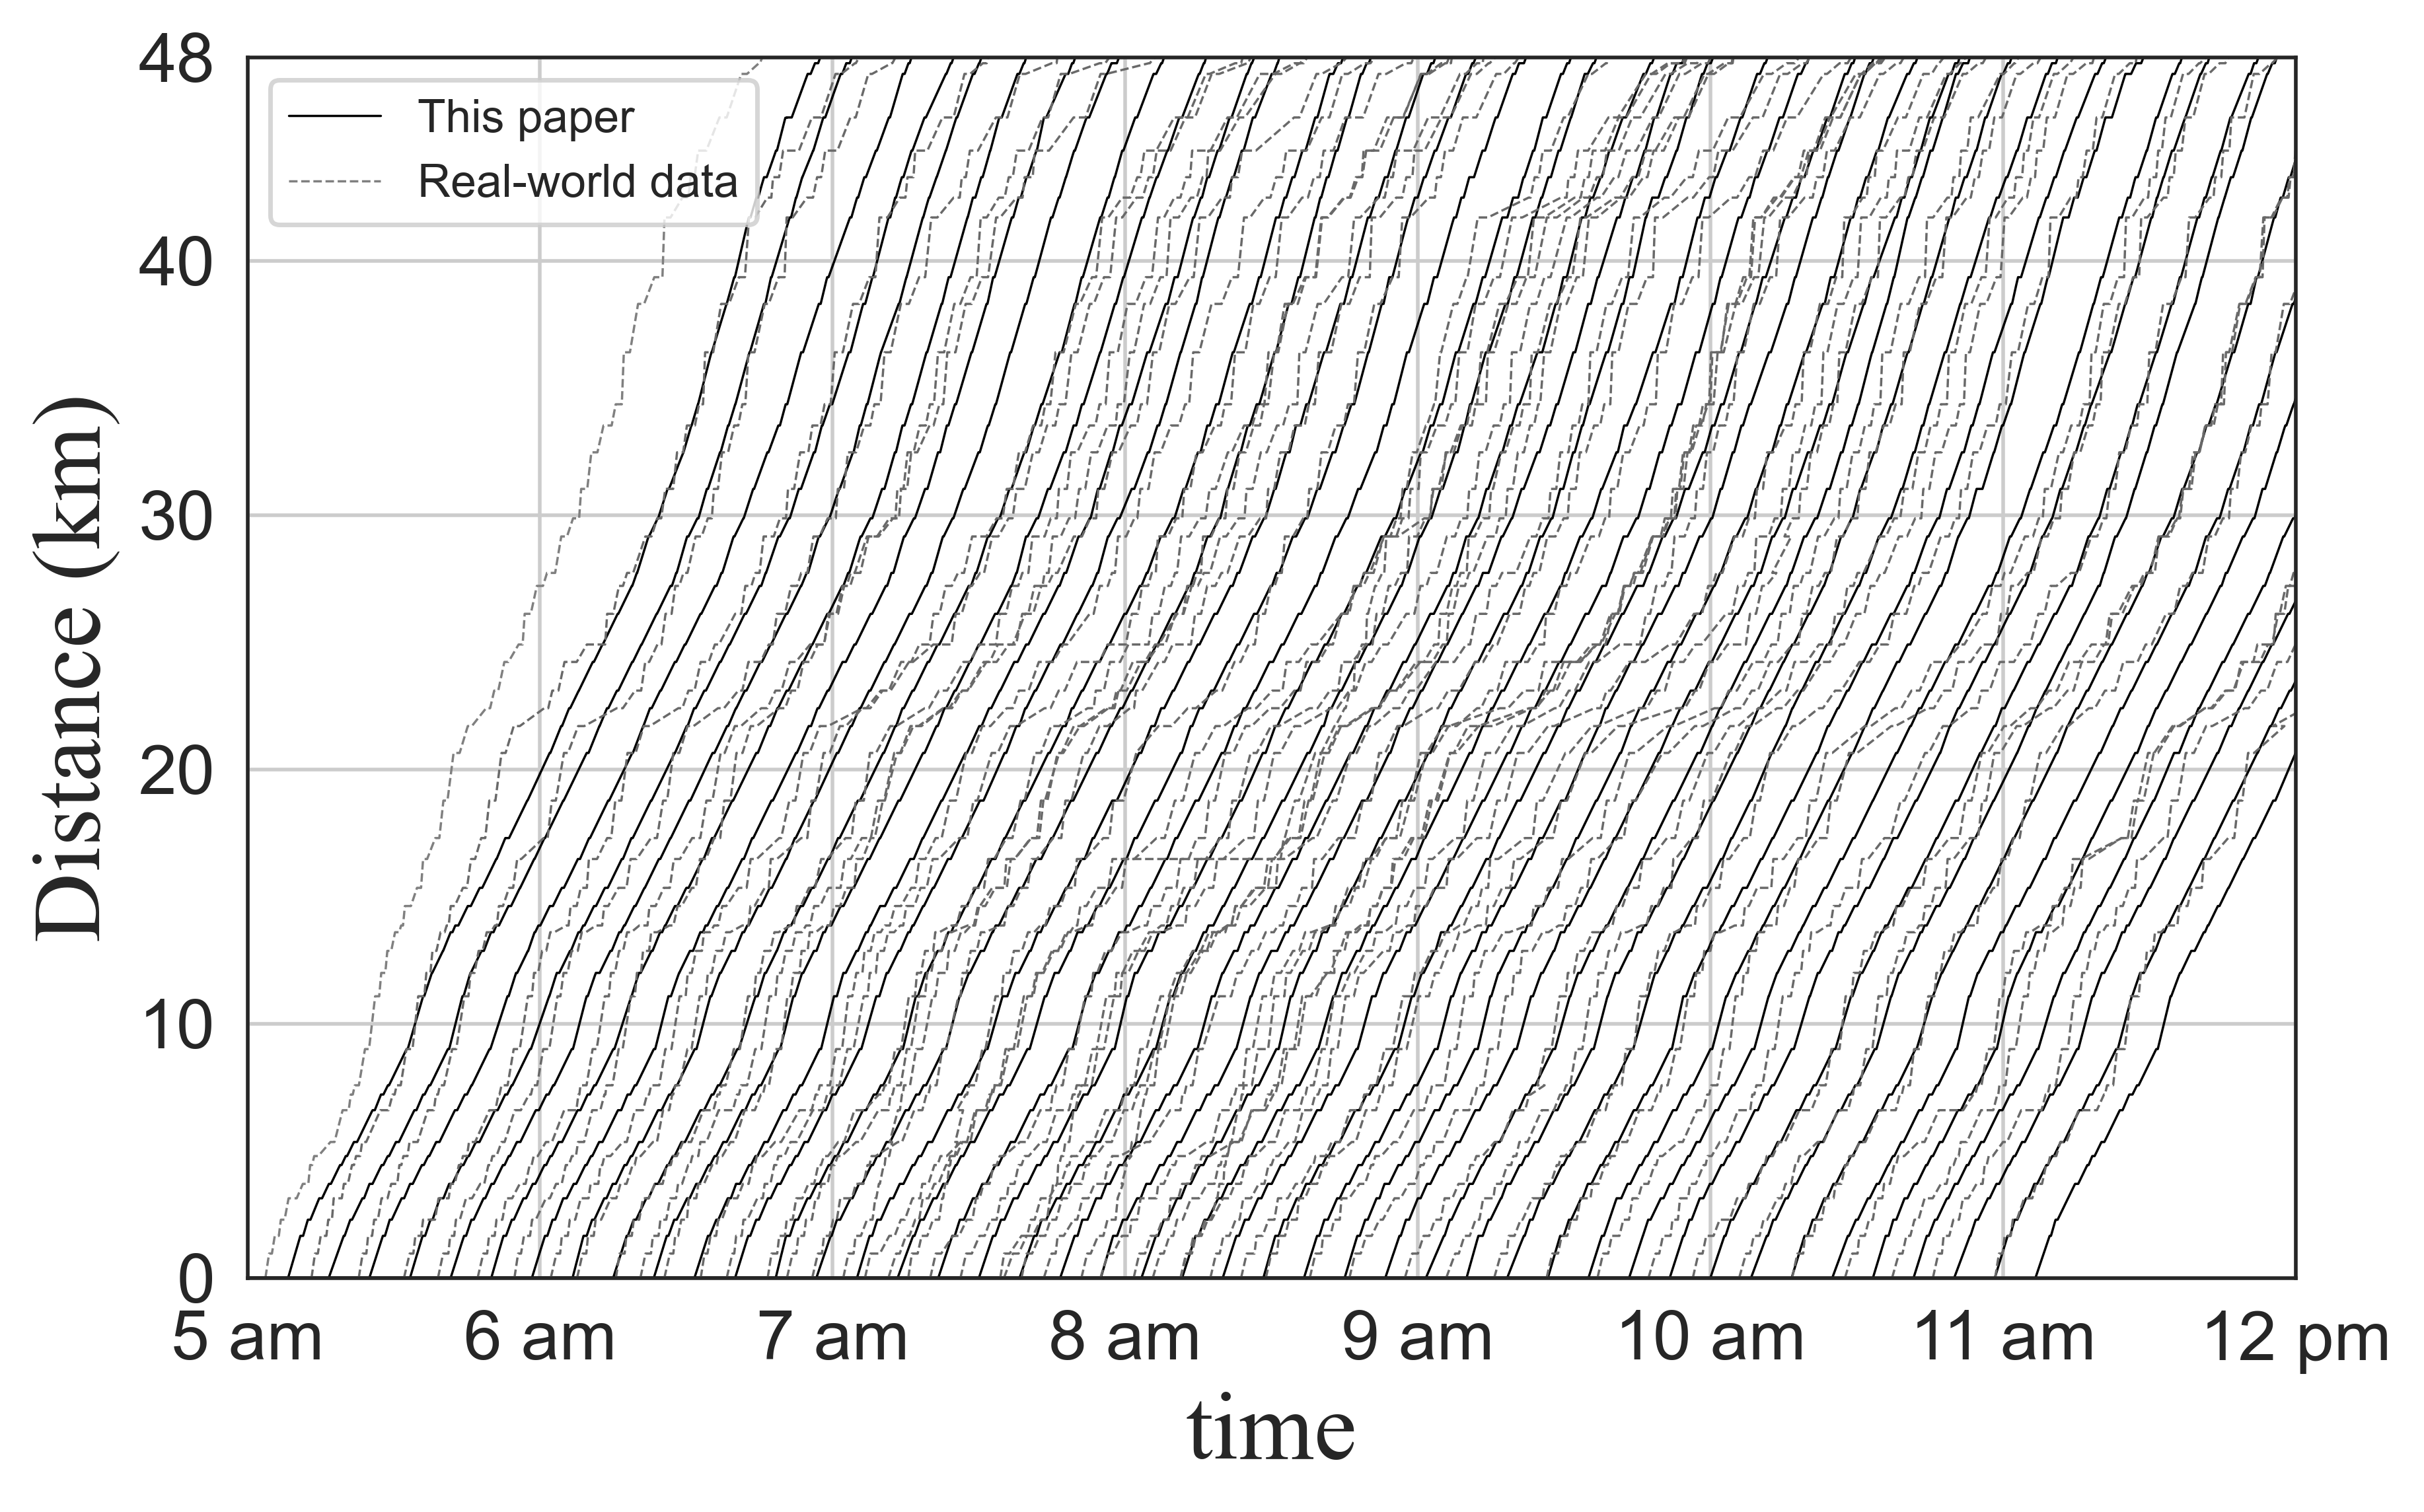

In [72]:
fig = plt.figure(figsize=(8,4.8),dpi=500)
sns.set_style('white')
plt.grid(True)  # 显示网格
plt.xlim(0,25200)
plt.ylim(0,48000);
plt.xticks(np.arange(0,25201,3600),("5 am","6 am","7 am","8 am","9 am","10 am","11 am","12 pm"),size=15)
plt.yticks([0,10000,20000,30000,40000,48000],("0","10","20","30","40","48"),size=15)

plt.plot( range(df_real.shape[0]), df_real.iloc[0:,1] , linewidth=0.5 ,color = "black")
plt.plot(real_world_time[0],real_world_position[0],linewidth=0.5 ,color = "grey", linestyle='--')

for i in range(2,45) :
    plt.plot( range(df_real.shape[0]), df_real.iloc[0:,i] , linewidth=0.5 ,color = "black")

for i in range(1,51):
    plt.plot(real_world_time[i],real_world_position[i],linewidth=0.5 ,color = "dimgray", linestyle='--')

plt.legend(labels = ["This paper", "Real-world data"],loc=0,fontsize=10)

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 21,
}

plt.xlabel("time", font)
plt.ylabel("Distance (km)", font)
plt.show()  # 显示图片

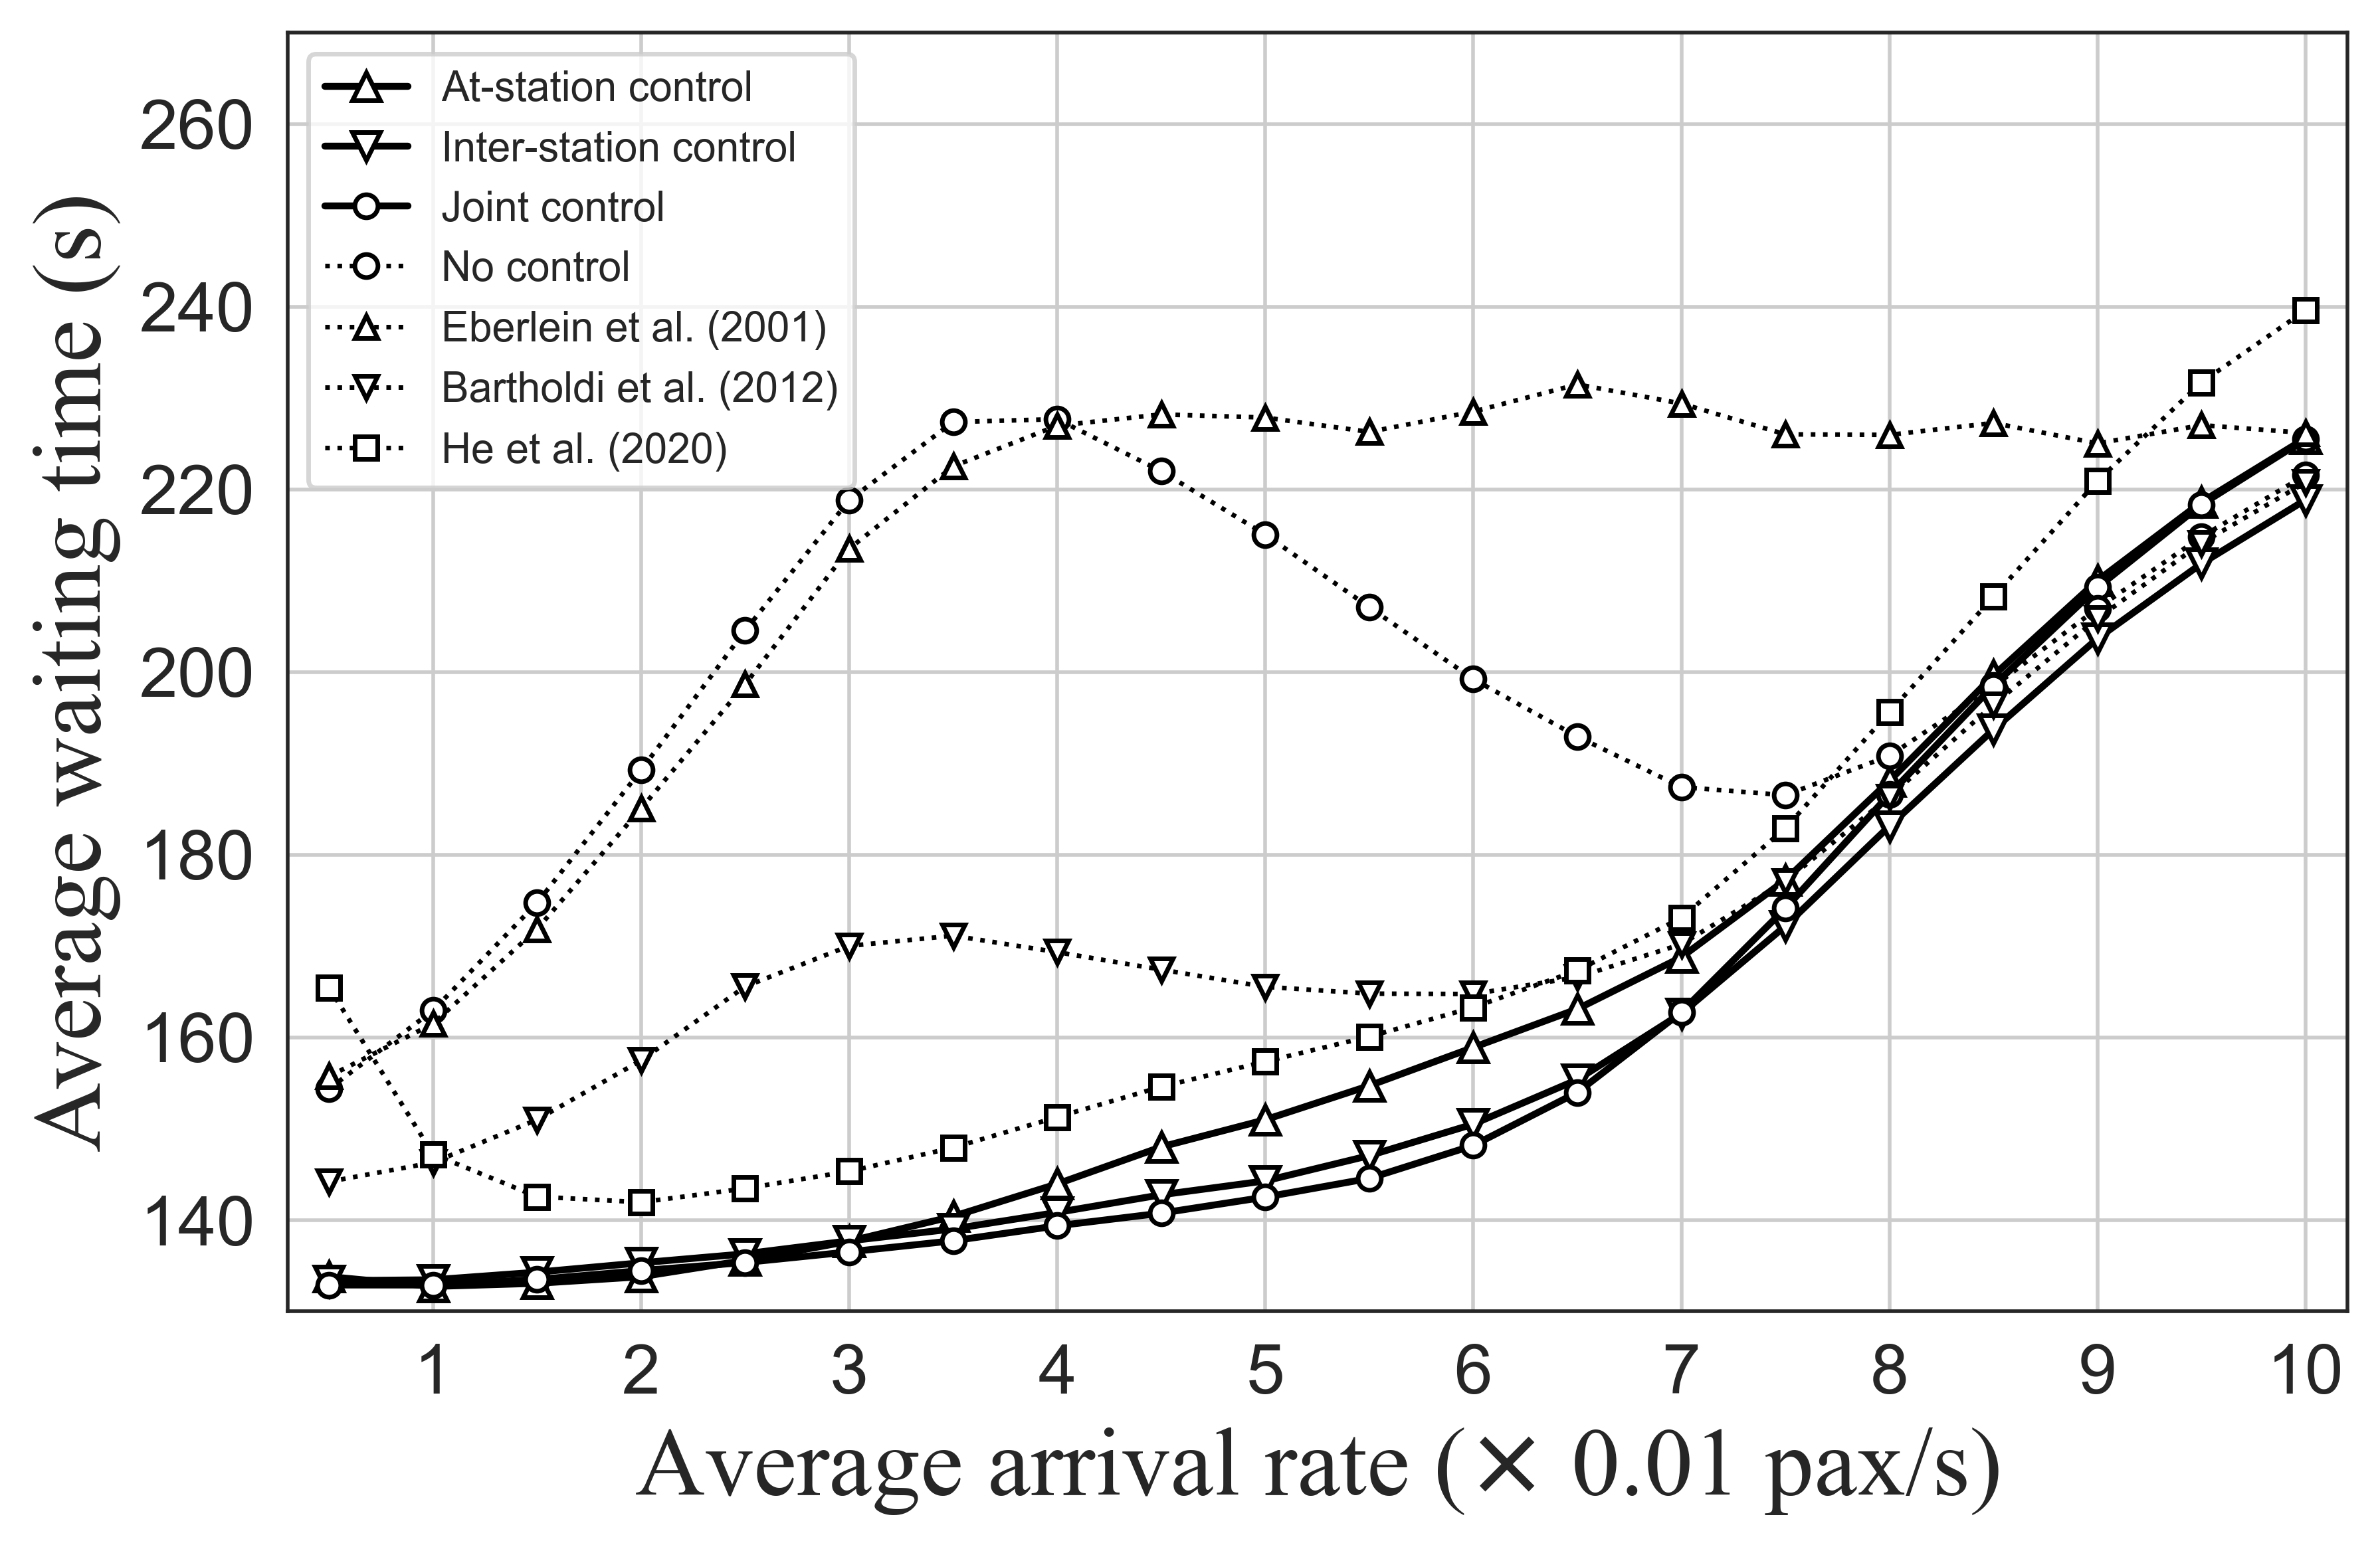

In [144]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "SensitivityAnalysis_ArrivalRate-AWT.csv"
path = path_name + file_name
df_AWT = pd.read_csv(path,index_col=0)
fig = plt.figure(figsize=(8,5),dpi=500)
sns.set_style('white')
plt.grid(True)  # 显示网格
plt.xlim(.3,10.2)
plt.ylim(130,270);

ticklist = np.arange(1,11,1)
plt.xticks( ticklist ,size=15)
plt.yticks( np.arange(140,280,20) ,size=15)


plt.plot( np.arange(0.005,0.101,0.005) * 100, df_AWT.iloc[1,:] , linewidth=1.5 ,color = "black", markerfacecolor='white', mec = 'black', marker='^', ms = 6, linestyle='-')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_AWT.iloc[2,:] , linewidth=1.5 ,color = "black", markerfacecolor='white', mec = 'black', marker='v', ms = 6, linestyle='-')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_AWT.iloc[3,:] , linewidth=1.5 ,color = "black", markerfacecolor='white', mec = 'black', marker='o', ms = 5, linestyle='-')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_AWT.iloc[0,:] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='o', ms = 5, linestyle=':' )
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_AWT.iloc[5,:] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='^', ms = 5, linestyle=':')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_AWT.iloc[4,:] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='v', ms = 5, linestyle=':')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_AWT.iloc[6,:] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='s', ms = 5, linestyle=':')

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 21,
}

plt.legend(labels = ["At-station control", "Inter-station control", "Joint control","No control",
                     "Eberlein et al. (2001)", "Bartholdi et al. (2012)", "He et al. (2020)"], fontsize=9)

plt.xlabel("Average arrival rate ($\\times$ 0.01 pax/s)", font)
plt.ylabel("Average waiting time (s)", font)
plt.show()  # 显示图片

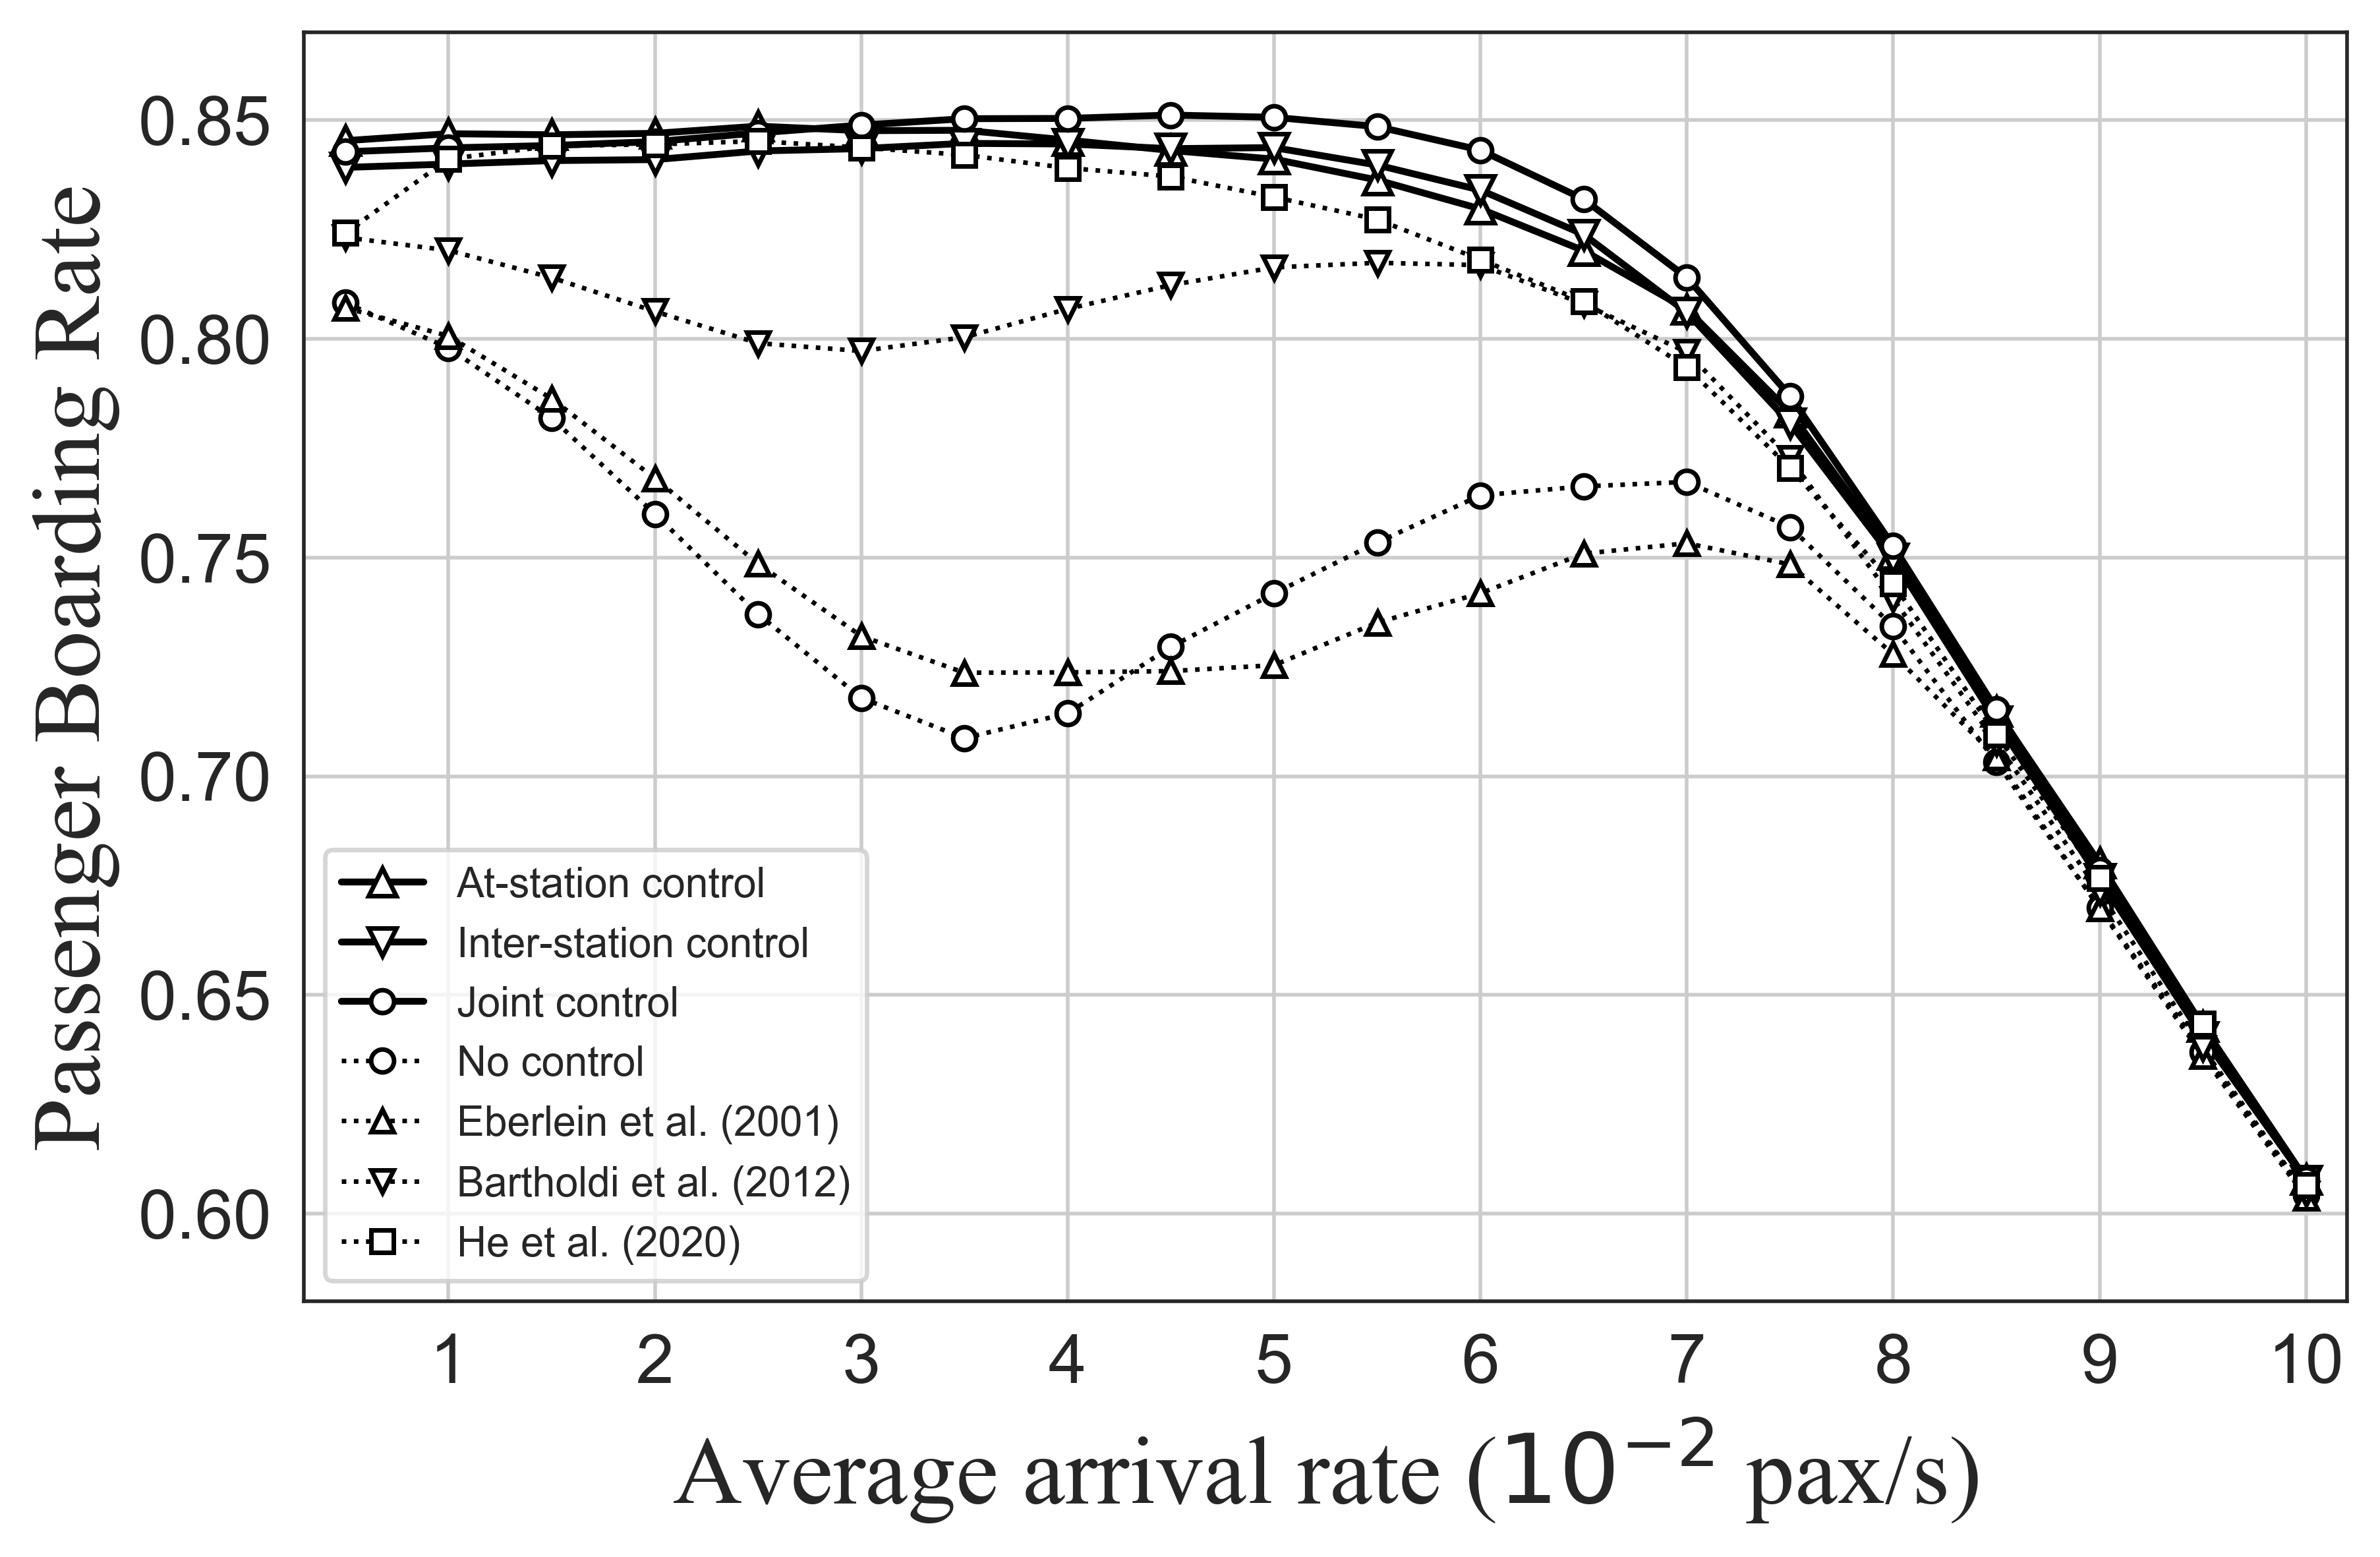

In [146]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "SensitivityAnalysis_ArrivalRate-PBR.csv"
path = path_name + file_name
df_PBR = pd.read_csv(path,index_col=0)
fig = plt.figure(figsize=(8,5),dpi=500)
sns.set_style('white')
plt.grid(True)  # 显示网格
plt.xlim(.3,10.2)
plt.ylim(0.58,0.87);

ticklist = np.arange(1,11,1)
plt.xticks( ticklist ,size=15)
plt.yticks( np.arange(0.60,0.86,0.05) ,size=15)

plt.plot( np.arange(0.005,0.101,0.005) * 100, df_PBR.iloc[1,:20] , linewidth=1.5 ,color = "black", markerfacecolor='white', mec = 'black', marker='^', ms = 6, linestyle='-')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_PBR.iloc[2,:20] , linewidth=1.5 ,color = "black", markerfacecolor='white', mec = 'black', marker='v', ms = 6, linestyle='-')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_PBR.iloc[3,:20] , linewidth=1.5 ,color = "black", markerfacecolor='white', mec = 'black', marker='o', ms = 5, linestyle='-')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_PBR.iloc[0,:20] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='o', ms = 5, linestyle=':' )
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_PBR.iloc[5,:20] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='^', ms = 5, linestyle=':')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_PBR.iloc[4,:20] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='v', ms = 5, linestyle=':')
plt.plot( np.arange(0.005,0.101,0.005) * 100, df_PBR.iloc[6,:20] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='s', ms = 5, linestyle=':')

plt.legend(labels = ["At-station control", "Inter-station control", "Joint control","No control",
                     "Eberlein et al. (2001)", "Bartholdi et al. (2012)", "He et al. (2020)"], fontsize=9,loc=3)

plt.xlabel("Average arrival rate ($10^{-2}$ pax/s)", font)
plt.ylabel("Passenger Boarding Rate", font)
plt.show()  # 显示图片

In [46]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "StationExpeiments_AWT.csv"
path = path_name + file_name
df_2 = pd.read_csv(path,index_col=0)

In [47]:
df_2

0           1           2           3  \
NoControl                      0  130.919991  132.233691  134.291257   
AtStationControl               0  129.808696  130.606916  130.786429   
InterStationControl            0  130.781919  130.883620  131.640516   
JointControl                   0  130.161275  129.932109  130.708574   
MinimumHeadway(Baseline_1)     0  130.829455  132.028612  133.816045   
QuadraticEberlein(Baseline_2)  0  130.429214  130.439840  132.418126   
He(Baseline_3)                 0  138.215444  142.228327  137.568643   

                                        4           5           6           7  \
NoControl                      136.680856  140.199620  144.070964  148.892788   
AtStationControl               130.828600  131.472271  132.415288  133.131389   
InterStationControl            132.110535  132.382593  133.088352  133.847508   
JointControl                   131.059628  131.368875  132.004557  132.906770   
MinimumHeadway(Baseline_1)     135.945210  137.844885  140.167307  142.570655   
QuadraticEberlein(Baseline_2)  133.044036  136.164411  139.749807  143.667561   
He(Baseline_3)                 140.442095  137.017832  140.164825  136.958969   

                                        8           9  ...          40  \
NoControl                      153.492706  158.996925  ...  265.180180   
AtStationControl               134.385731  135.794581  ...  134.979845   
InterStationControl            134.714363  135.403638  ...  137.819206   
JointControl                   133.053911  134.135896  ...  136.801080   
MinimumHeadway(Baseline_1)     144.694885  146.917600  ...  182.714677   
QuadraticEberlein(Baseline_2)  147.402268  152.007084  ...  260.587620   
He(Baseline_3)                 138.433107  138.891656  ...  150.300573   

                                       41          42          43          44  \
NoControl                      267.368583  267.472997  269.917991  270.370380   
AtStationControl               135.002500  135.202692  133.901139  134.600525   
InterStationControl            137.580837  137.491376  137.497376  137.759630   
JointControl                   136.322408  137.331668  137.656019  136.735573   
MinimumHeadway(Baseline_1)     182.815624  183.972354  185.060136  184.928594   
QuadraticEberlein(Baseline_2)  261.912213  264.010542  264.684285  264.875197   
He(Baseline_3)                 151.720888  152.158695  153.117149  153.586481   

                                       45          46          47          48  \
NoControl                      271.106703  273.293880  272.589076  275.932503   
AtStationControl               133.961381  133.796057  133.426346  134.155967   
InterStationControl            137.837109  136.721766  137.810842  137.369289   
JointControl                   135.863164  136.598957  135.997741  136.566947   
MinimumHeadway(Baseline_1)     185.748388  187.659904  188.257126  189.102866   
QuadraticEberlein(Baseline_2)  270.459428  269.432170  273.082197  275.436869   
He(Baseline_3)                 153.911757  155.450375  155.121910  157.148260   

                                       49  
NoControl                      277.680675  
AtStationControl               133.715046  
InterStationControl            138.112657  
JointControl                   136.359834  
MinimumHeadway(Baseline_1)     190.237609  
QuadraticEberlein(Baseline_2)  266.889922  
He(Baseline_3)                 157.483969  

[7 rows x 50 columns]

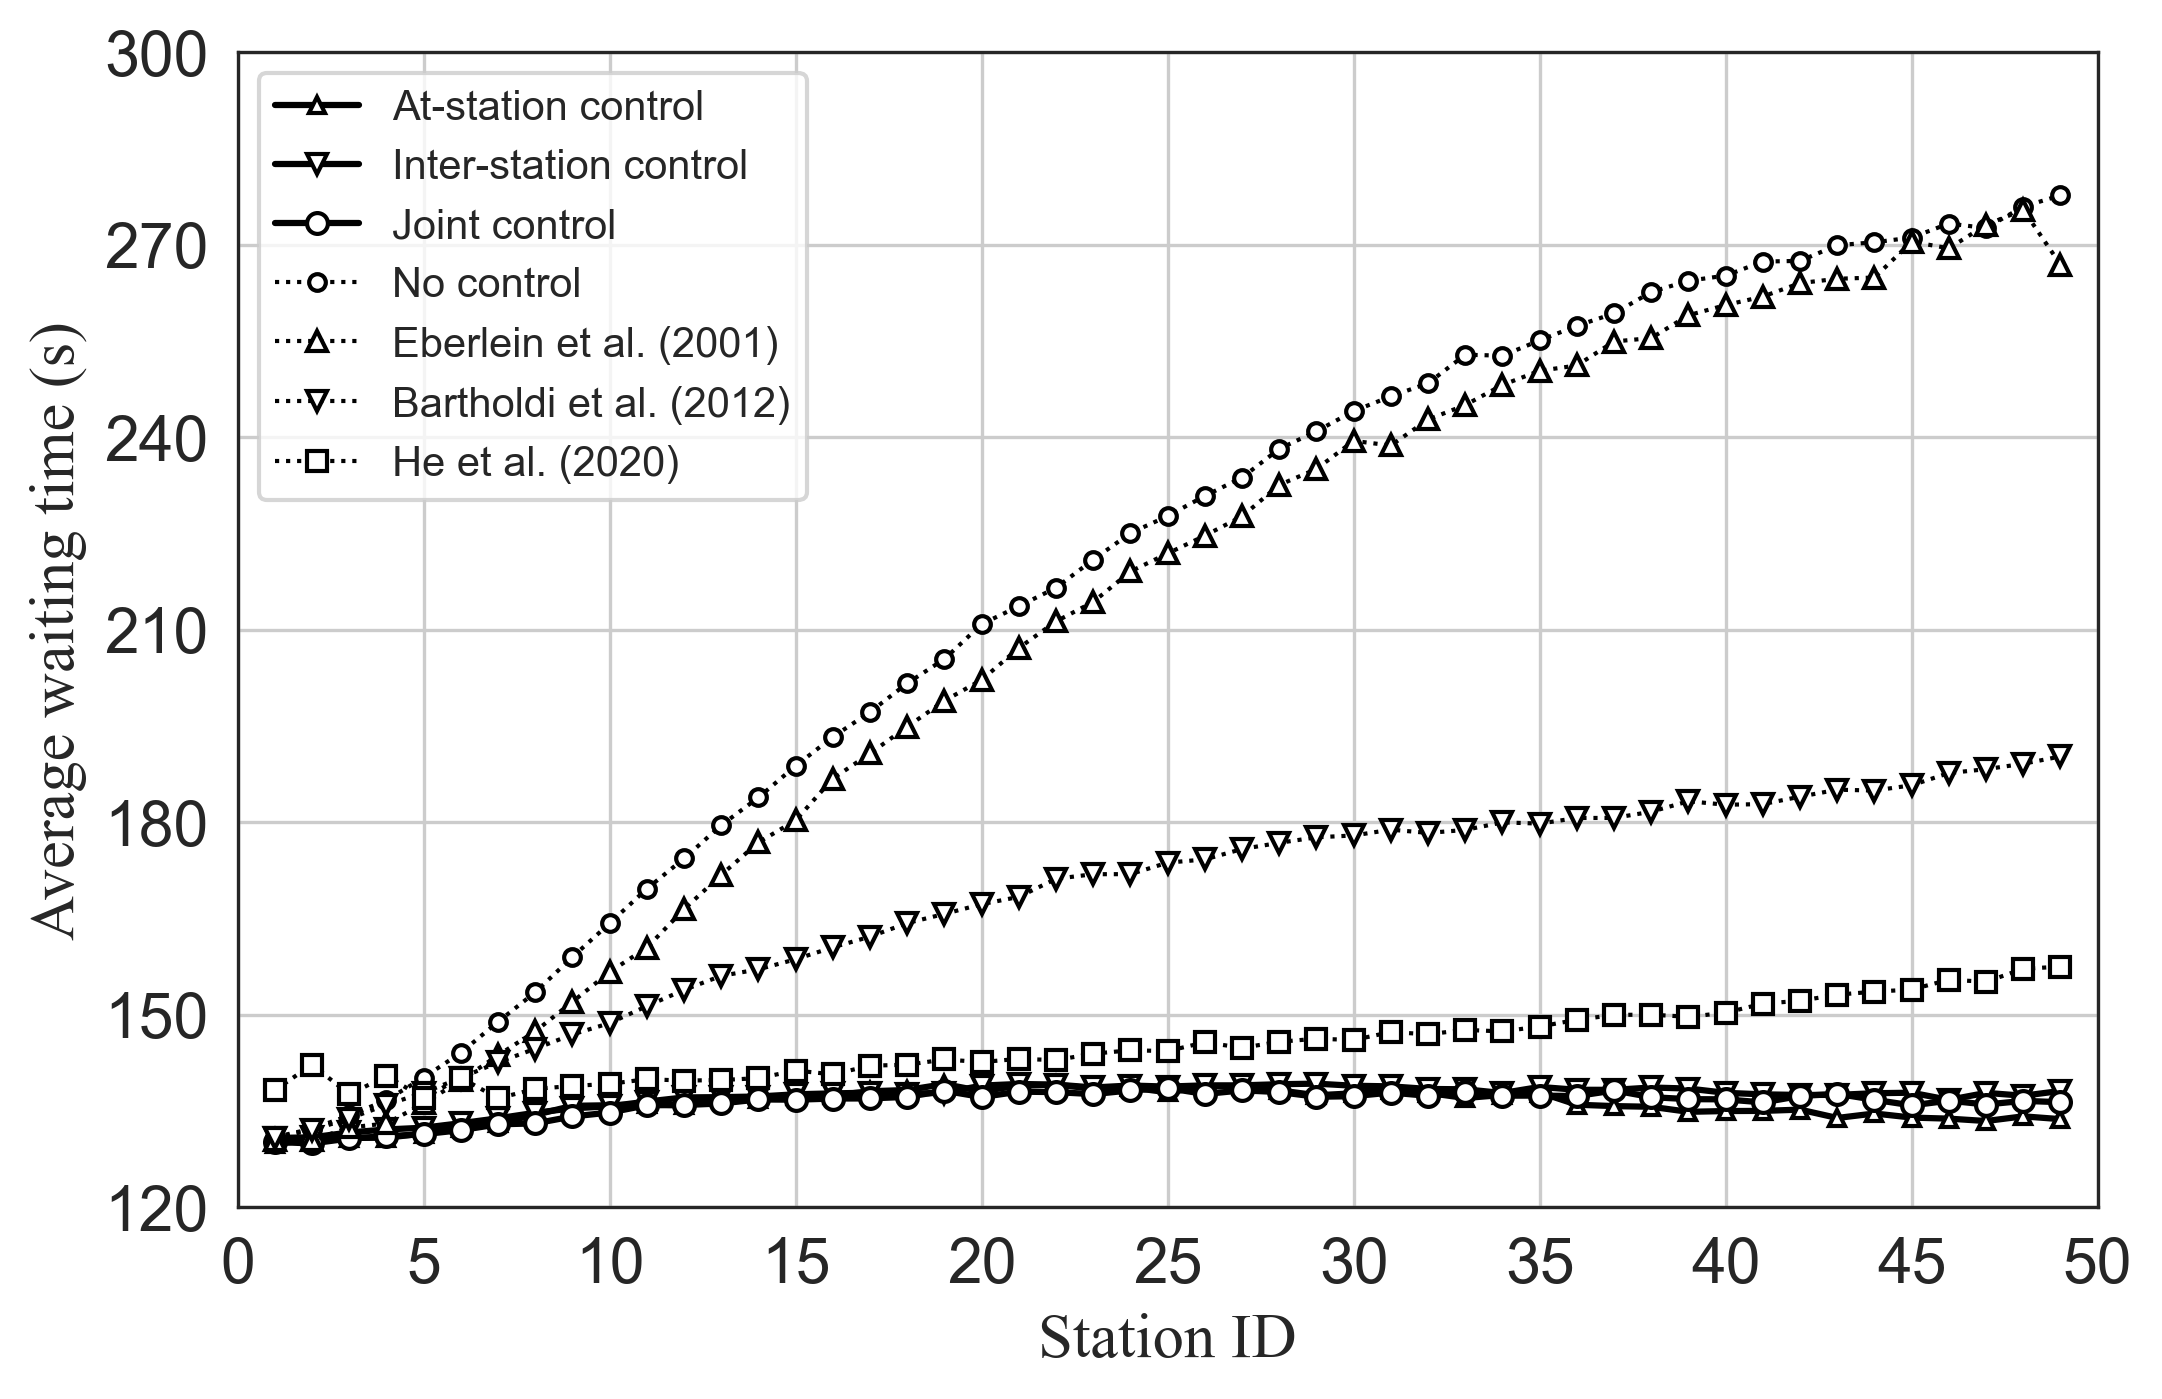

In [48]:
df_2 = pd.read_csv(path, index_col=0)
fig = plt.figure(figsize=(8,5), dpi=300)
sns.set_style('white')
plt.grid(True)  # 显示网格
plt.xlim(0, 50)
# plt.ylim(0.59, 0.91);
plt.ylim(120, 300);

plt.xticks(np.arange(0,51,5),size=15)
plt.yticks(np.arange(120,301,30),size=15)

plt.plot(np.arange(1, 50), df_2.iloc[1,1:], linewidth=1.5, color="black", markerfacecolor='white',
         mec='black', marker='^', ms=4, linestyle='-')
plt.plot(np.arange(1, 50), df_2.iloc[2,1:], linewidth=1.5, color="black", markerfacecolor='white',
         mec='black', marker='v', ms=5, linestyle='-')
plt.plot(np.arange(1, 50), df_2.iloc[3,1:], linewidth=1.5, color="black", markerfacecolor='white',
         mec='black', marker='o', ms=5, linestyle='-')
plt.plot(np.arange(1, 50), df_2.iloc[0,1:], linewidth=1, color="black", markerfacecolor='white',
         mec='black', marker='o', ms=4, linestyle=':')
plt.plot(np.arange(1, 50), df_2.iloc[5,1:], linewidth=1, color="black", markerfacecolor='white',
         mec='black', marker='^', ms=5, linestyle=':')
plt.plot(np.arange(1, 50), df_2.iloc[4,1:], linewidth=1, color="black", markerfacecolor='white',
         mec='black', marker='v', ms=5, linestyle=':')
plt.plot(np.arange(1, 50), df_2.iloc[6,1:], linewidth=1, color="black", markerfacecolor='white',
         mec='black', marker='s', ms=5, linestyle=':')



plt.legend(labels = ["At-station control", "Inter-station control", "Joint control","No control",
                     "Eberlein et al. (2001)", "Bartholdi et al. (2012)", "He et al. (2020)"], fontsize=10,loc=0)

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 15,
        }
plt.xlabel("Station ID", font)
plt.ylabel("Average waiting time (s)", font)
# plt.ylabel("Passenger Boarding Rate", font)
plt.show()  # 显示图片

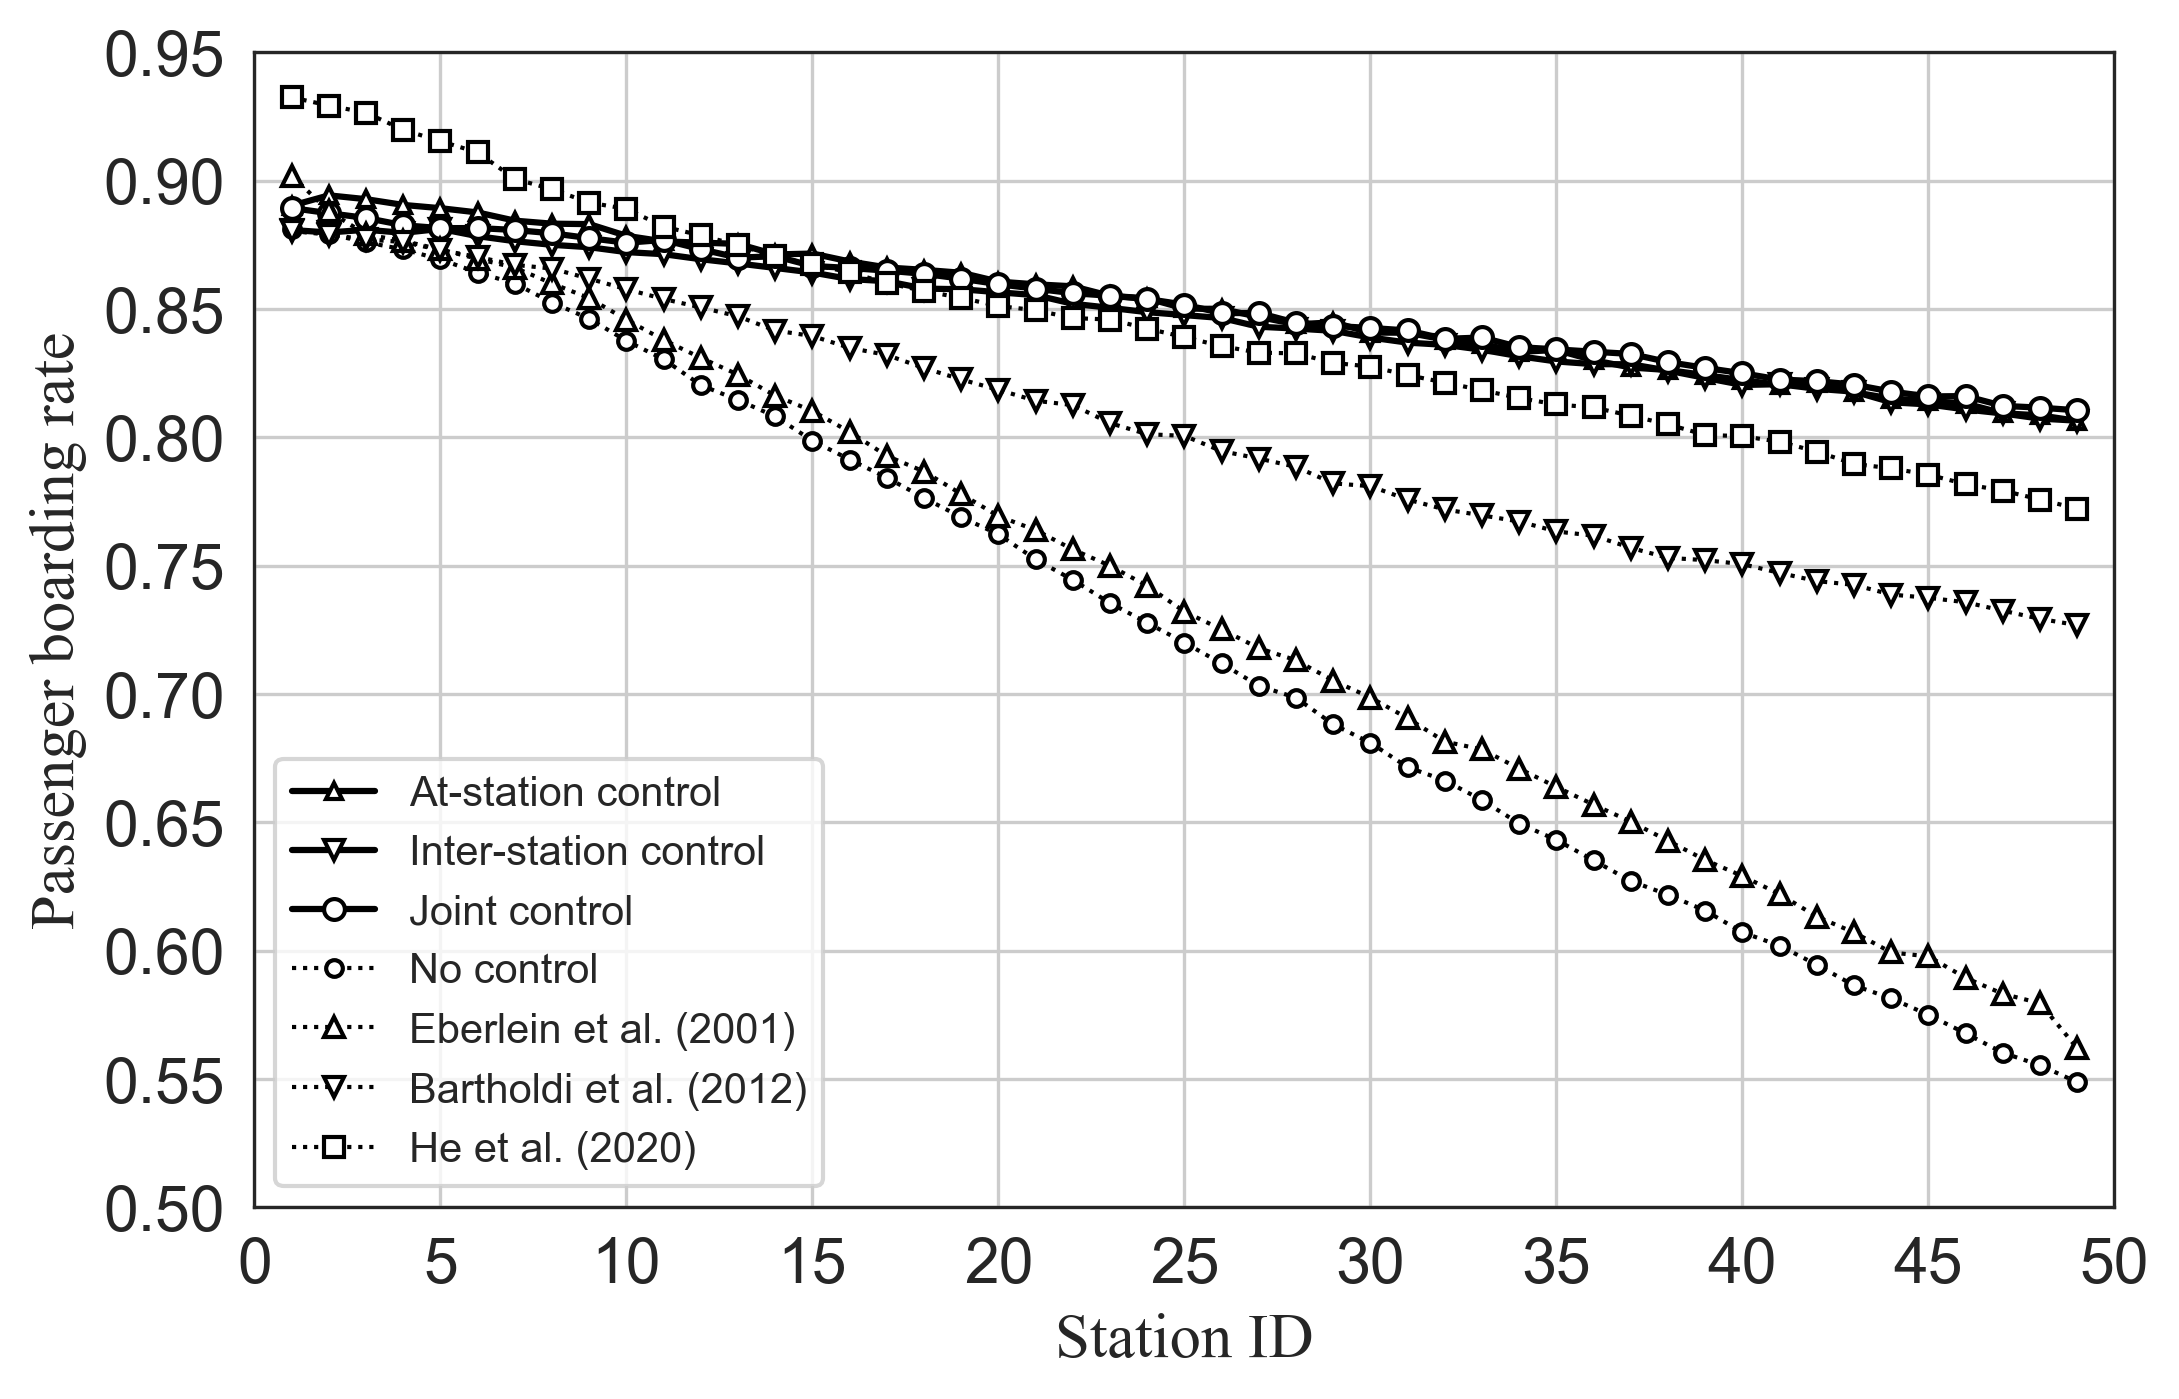

In [50]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "StationExpeiments_PBR.csv"
path = path_name + file_name
df_2 = pd.read_csv(path,index_col=0)
df_2 = pd.read_csv(path, index_col=0)
fig = plt.figure(figsize=(8,5), dpi=300)
sns.set_style('white')
plt.grid(True)  # 显示网格
plt.xlim(0, 50)
plt.ylim(0.50, 0.95);
# plt.ylim(120, 300);

plt.xticks(np.arange(0,51,5),size=15)
plt.yticks(np.arange(.50,.96,.05),size=15)

plt.plot(np.arange(1, 50), df_2.iloc[1,1:], linewidth=1.5, color="black", markerfacecolor='white',
         mec='black', marker='^', ms=4, linestyle='-')
plt.plot(np.arange(1, 50), df_2.iloc[2,1:], linewidth=1.5, color="black", markerfacecolor='white',
         mec='black', marker='v', ms=5, linestyle='-')
plt.plot(np.arange(1, 50), df_2.iloc[3,1:], linewidth=1.5, color="black", markerfacecolor='white',
         mec='black', marker='o', ms=5, linestyle='-')
plt.plot(np.arange(1, 50), df_2.iloc[0,1:], linewidth=1, color="black", markerfacecolor='white',
         mec='black', marker='o', ms=4, linestyle=':')
plt.plot(np.arange(1, 50), df_2.iloc[5,1:], linewidth=1, color="black", markerfacecolor='white',
         mec='black', marker='^', ms=5, linestyle=':')
plt.plot(np.arange(1, 50), df_2.iloc[4,1:], linewidth=1, color="black", markerfacecolor='white',
         mec='black', marker='v', ms=5, linestyle=':')
plt.plot(np.arange(1, 50), df_2.iloc[6,1:], linewidth=1, color="black", markerfacecolor='white',
         mec='black', marker='s', ms=5, linestyle=':')



plt.legend(labels = ["At-station control", "Inter-station control", "Joint control","No control",
                     "Eberlein et al. (2001)", "Bartholdi et al. (2012)", "He et al. (2020)"], fontsize=10,loc=0)

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 15,
        }
plt.xlabel("Station ID", font)
plt.ylabel("Passenger boarding rate", font)
# plt.ylabel("Passenger Boarding Rate", font)
plt.show()  # 显示图片

In [156]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "SensitivityAnalysis_Imax-AWT.csv"
path = path_name + file_name
df_3 = pd.read_csv(path,index_col=0)

In [157]:
df_3

0           5          10          15  \
AtStationControl            218.196315  212.153946  205.676991  198.564834   
MinimumHeadway(Baseline_1)  218.398348  214.372642  210.301086  205.572409   

                                    20          25          30          35  \
AtStationControl            190.295270  182.718808  174.833034  166.123127   
MinimumHeadway(Baseline_1)  200.696698  195.822283  190.803190  185.733122   

                                    40          45  ...          80  \
AtStationControl            156.977383  150.325985  ...  135.752019   
MinimumHeadway(Baseline_1)  180.901885  176.557075  ...  168.163826   

                                    85          90          95         100  \
AtStationControl            135.778345  135.716122  135.671648  135.805703   
MinimumHeadway(Baseline_1)  168.271597  168.008512  167.647707  167.957459   

                                   105         110         115         120  \
AtStationControl            135.736329  135.798778  135.715381  135.745952   
MinimumHeadway(Baseline_1)  167.889119  167.961823  167.718418  168.007272   

                            Unnamed: 26  
AtStationControl                    NaN  
MinimumHeadway(Baseline_1)          NaN  

[2 rows x 26 columns]

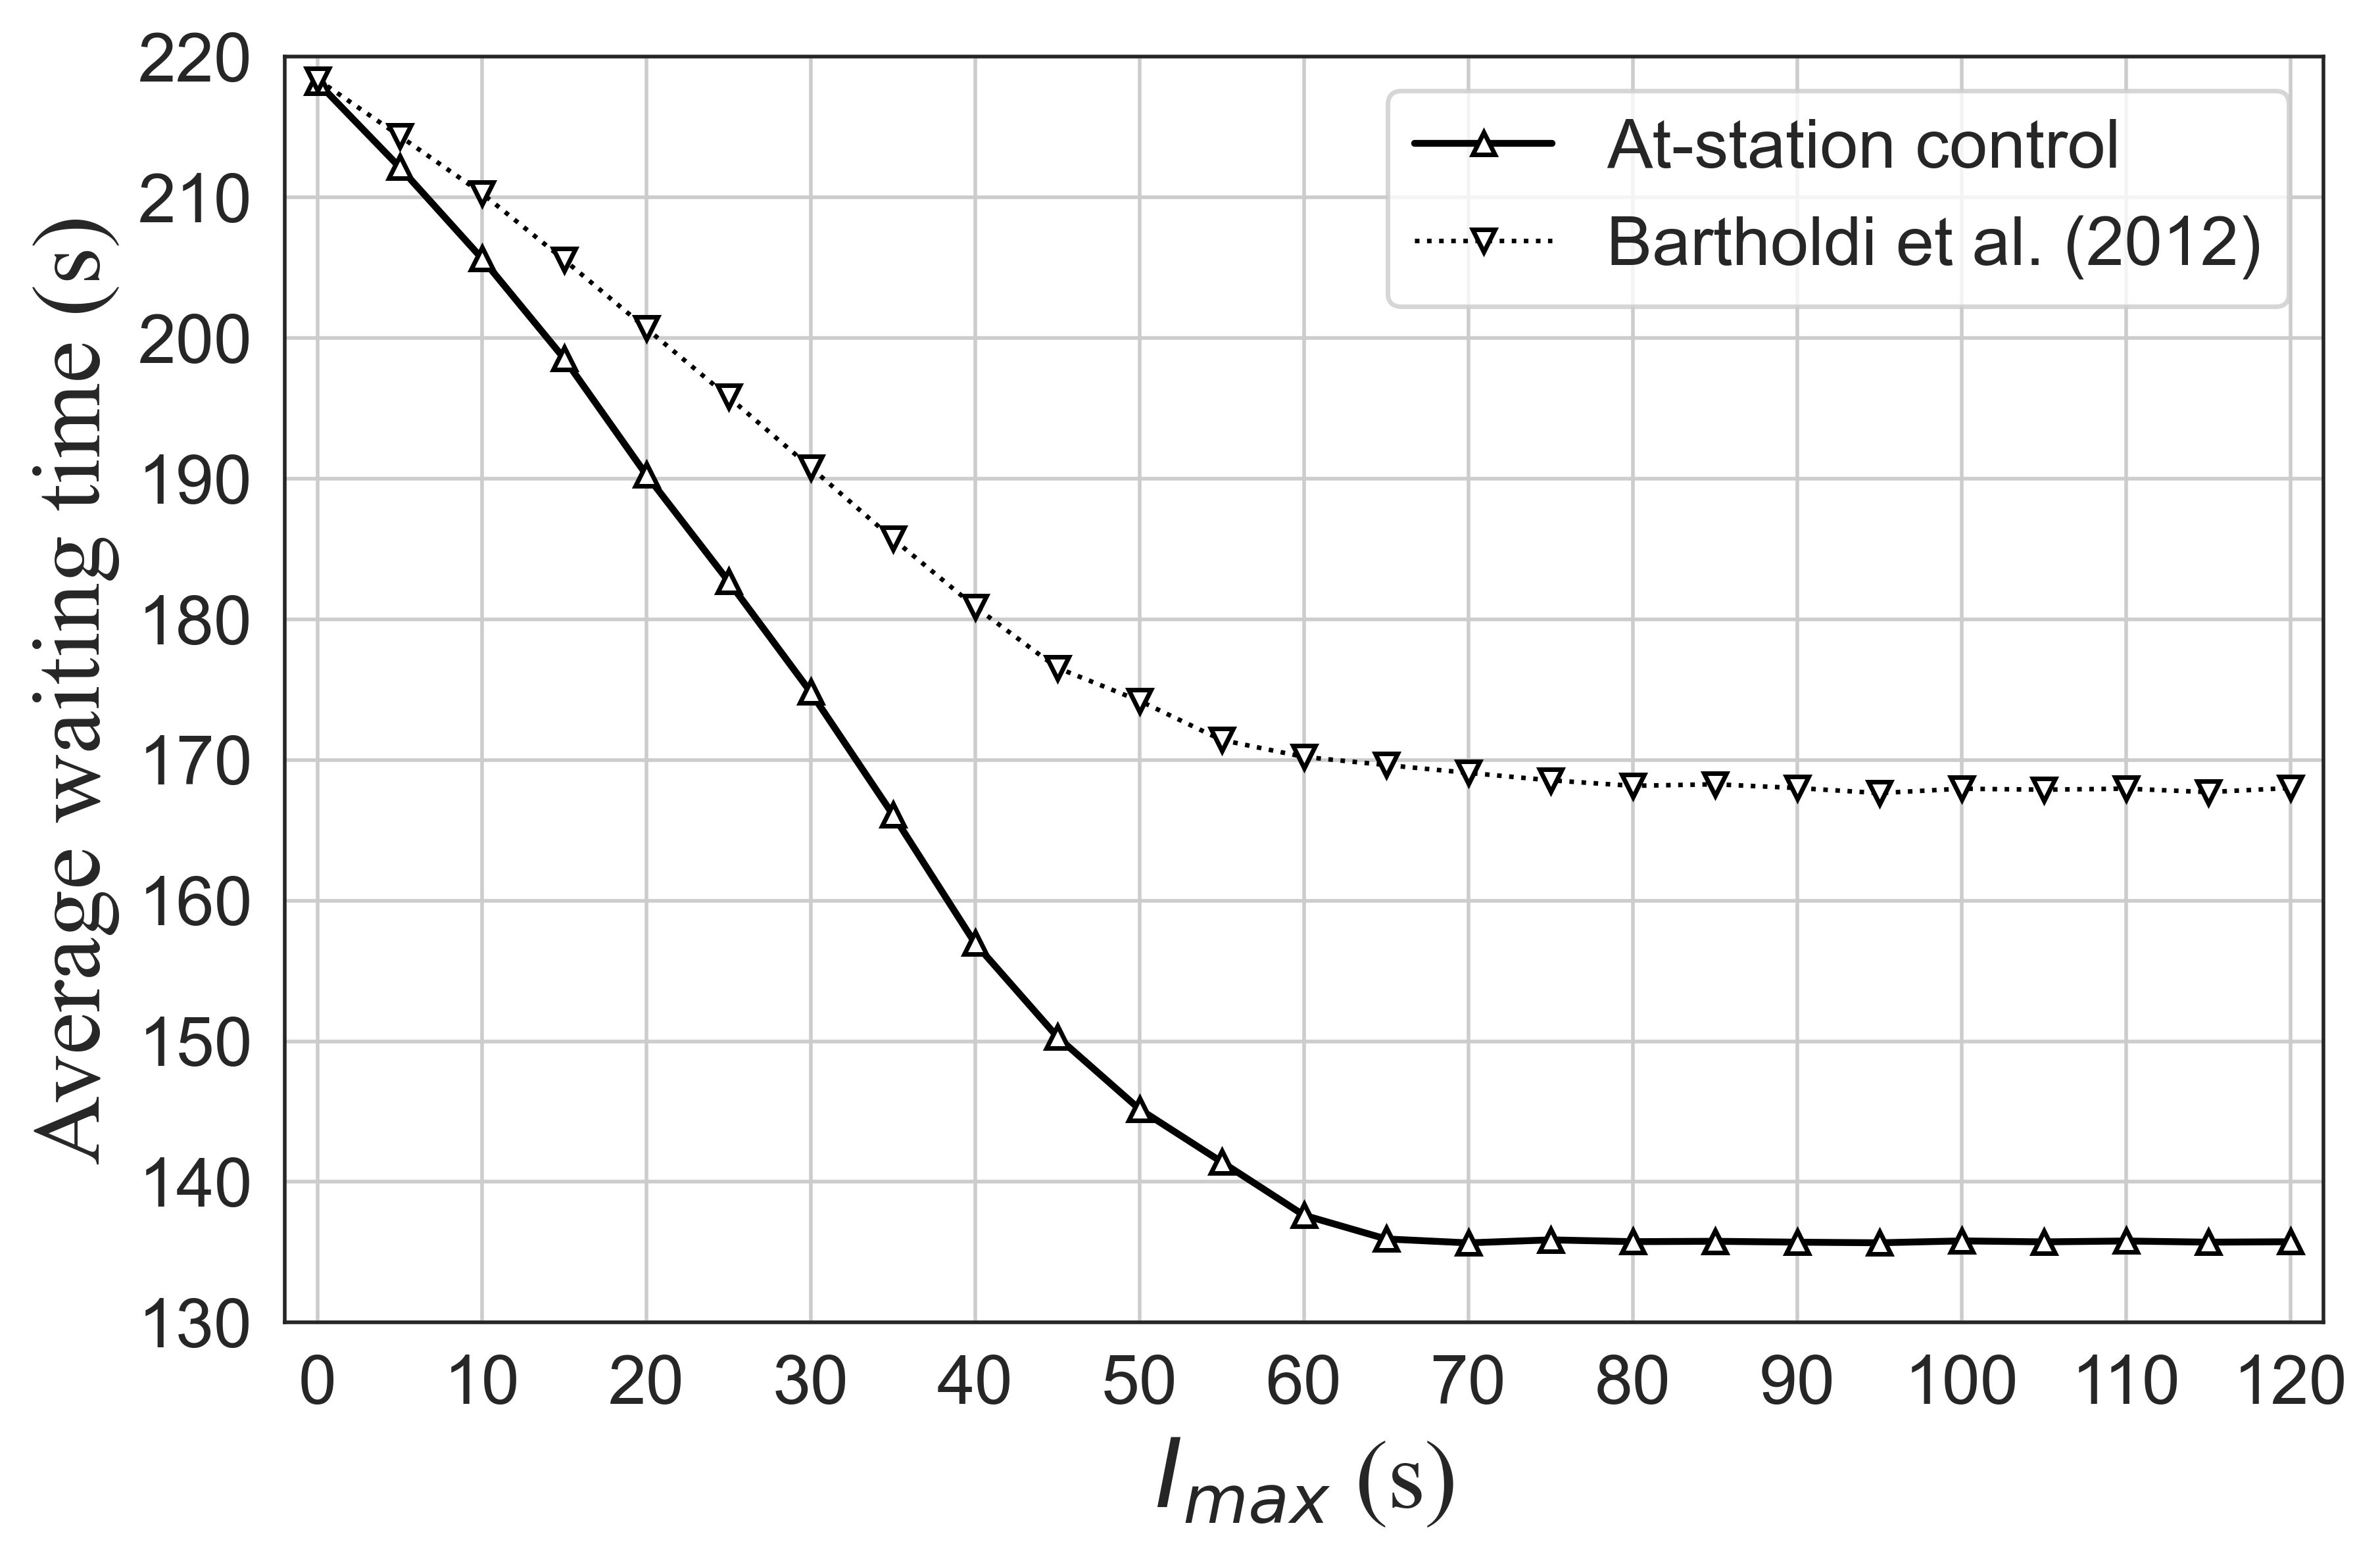

In [158]:
fig = plt.figure(figsize=(8,5),dpi=500)
sns.set_style('white')
plt.grid(True)  # 显示网格
plt.xlim(-2,122)
plt.ylim(130,220);
plt.xticks(np.arange(0,121,10),size=15)
plt.yticks(np.arange(130,221,10),size=15)

p1 = plt.plot( np.arange(0,121,5), df_3.iloc[0,:25] , linewidth=1.5 ,color = "black", markerfacecolor='white', mec = 'black', marker='^', ms = 5, linestyle='-', )
p2 = plt.plot( np.arange(0,121,5), df_3.iloc[1,:25] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='v', ms = 5, linestyle=':')

plt.legend(labels = ["At-station control","Bartholdi et al. (2012)"],loc="upper right",fontsize=15)

plt.xlabel("$I_{max}$ (s)", font)
plt.ylabel("Average waiting time (s)", font)
plt.show()  # 显示图片

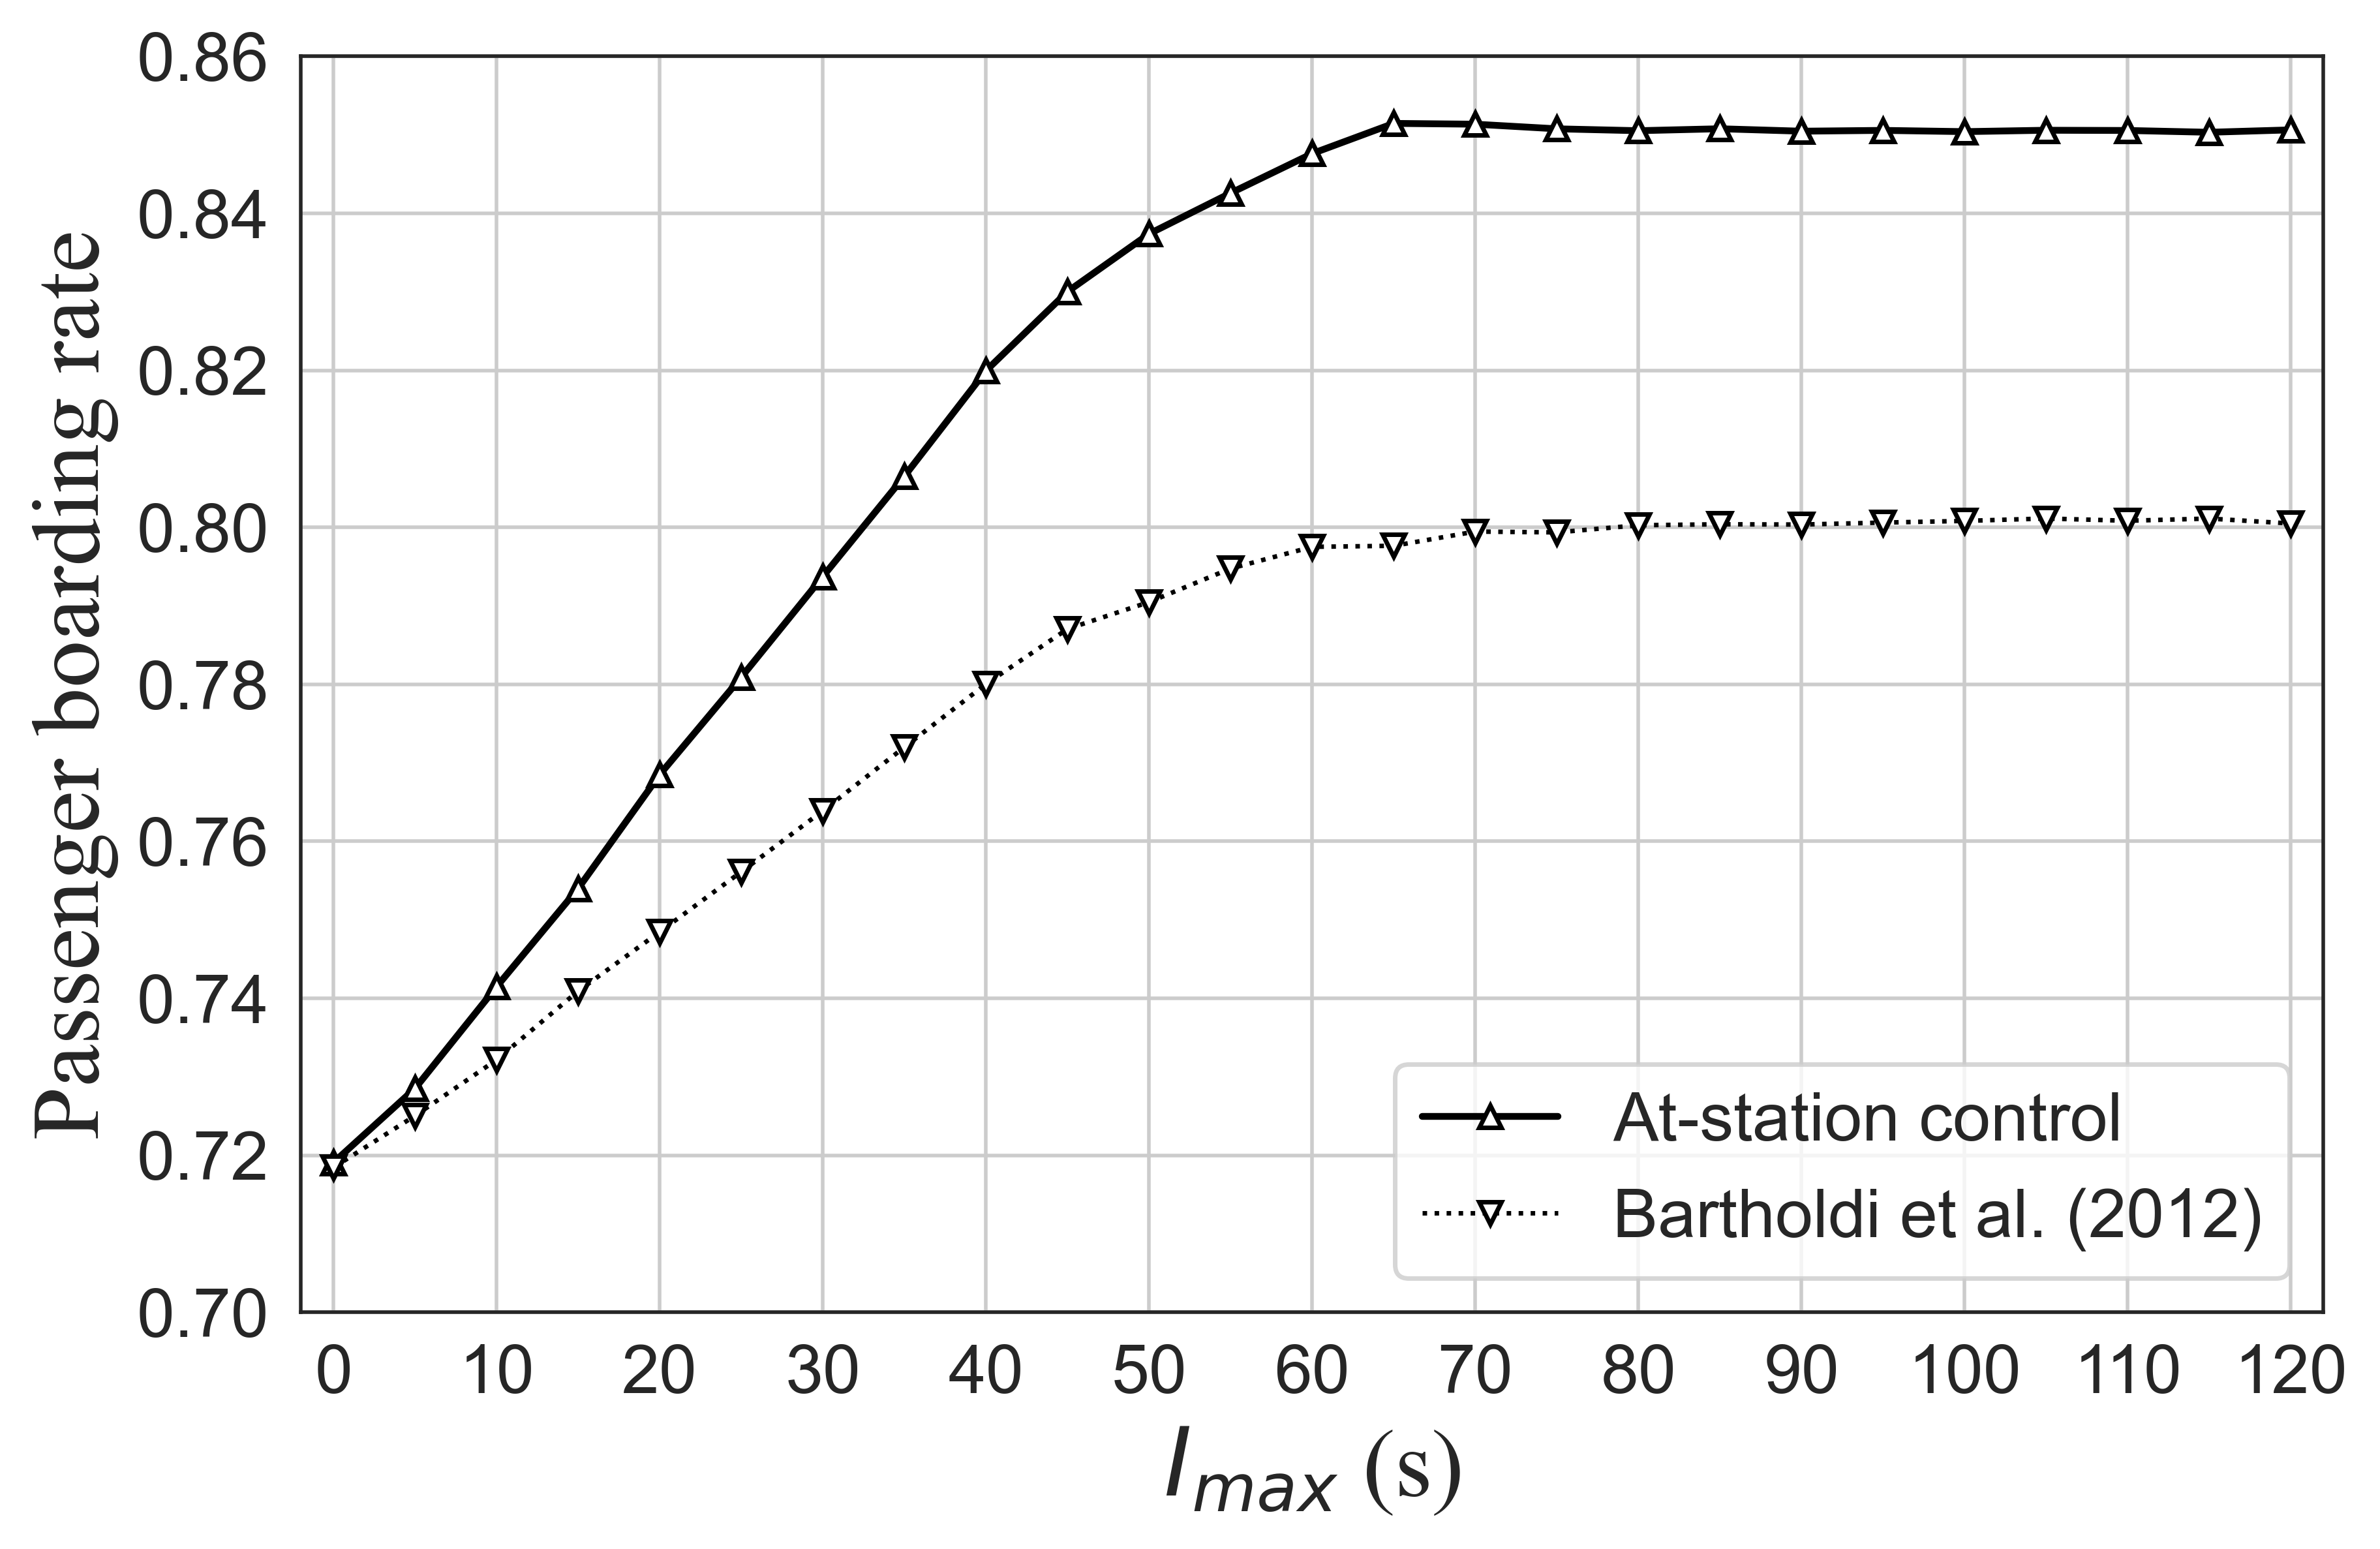

In [154]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "SensitivityAnalysis_Imax-PBR.csv"
path = path_name + file_name
df_3 = pd.read_csv(path,index_col=0)
fig = plt.figure(figsize=(8,5),dpi=500)
sns.set_style('white')
plt.grid(True)  # 显示网格
plt.xlim(-2,122)
plt.ylim(.70,.86);
plt.xticks(np.arange(0,121,10),size=15)
plt.yticks(np.arange(0.7,0.87,0.02), size = 15)
p1 = plt.plot( np.arange(0,121,5), df_3.iloc[0,:25] , linewidth=1.5 ,color = "black", markerfacecolor='white', mec = 'black', marker='^', ms = 5, linestyle='-', )
p2 = plt.plot( np.arange(0,121,5), df_3.iloc[1,:25] , linewidth=1.0 ,color = "black", markerfacecolor='white', mec = 'black', marker='v', ms = 5, linestyle=':')

plt.legend(labels = ["At-station control","Bartholdi et al. (2012)"],loc="lower right",fontsize=15)

plt.xlabel("$I_{max}$ (s)", font)
plt.ylabel("Passenger boarding rate", font)
plt.show()  # 显示图片

In [16]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "SensitivityAnalysis_ImaxImin-AWT.csv"
# file_name = "SensitivityAnalysis_ImaxImin-PBR.csv"
path = path_name + file_name
df_3 = pd.read_csv(path,index_col=0)
df_3

0           5          10          15          20          25  \
 0   218.494484  212.739226  205.918729  197.553601  189.709732  182.418612   
-5   212.362430  205.228723  197.687919  190.091189  182.262148  174.243724   
-10  204.706826  197.562974  189.971582  182.357598  174.091917  164.716582   
-15  196.385427  189.282436  182.004601  173.943411  164.505650  155.633514   
-20  187.884632  181.198995  174.041272  165.823751  156.746439  150.114398   
-25  180.323766  175.208695  168.103373  159.513104  152.411578  147.134814   
-30  176.206442  170.251155  163.581225  156.765953  150.843938  146.211646   
-35  172.027841  167.124262  160.899529  155.184213  150.247456  146.117623   
-40  169.616725  164.962812  159.594664  154.591961  150.270869  145.930541   
-45  167.772985  163.911449  159.541163  154.595586  150.335200  146.337382   
-50  166.950850  163.961778  159.650538  154.809137  150.238371  146.311398   
-55  167.381754  164.074556  159.587038  155.170938  150.667778  146.456160   
-60  167.748604  164.272200  159.803128  155.479114  150.269642  146.651418   

             30          35          40          45  ...          80  \
 0   174.830771  166.392844  157.569327  150.168827  ...  135.767256   
-5   165.184645  155.897900  149.018941  144.400897  ...  135.778192   
-10  155.180458  148.482162  143.753916  140.189627  ...  135.780918   
-15  148.640681  144.154442  140.844540  138.201434  ...  136.035915   
-20  145.432284  141.903679  138.988490  137.606865  ...  136.167571   
-25  143.502603  140.244668  138.542203  137.348201  ...  136.405143   
-30  142.800899  140.336651  138.361018  136.959831  ...  136.192911   
-35  142.813834  140.453599  138.340409  137.348024  ...  136.358587   
-40  142.655457  140.275040  138.371836  137.230802  ...  136.463166   
-45  142.927665  140.337084  138.343128  137.294734  ...  136.472666   
-50  142.989417  140.189965  138.396470  137.152908  ...  136.381331   
-55  142.867408  140.221138  138.177854  137.330464  ...  136.371025   
-60  143.156367  140.216337  138.304294  137.298663  ...  136.433546   

             85          90          95         100         105         110  \
 0   135.758533  135.666851  135.824273  135.839447  135.832095  135.760947   
-5   135.637206  135.775153  135.588490  135.470531  135.520916  135.512201   
-10  135.742665  135.660979  135.692162  135.504049  135.292274  135.331321   
-15  135.863133  135.852333  135.669104  135.613250  135.571247  135.576273   
-20  135.930523  136.065021  135.892703  135.921520  135.961436  135.814679   
-25  136.387100  136.341480  136.352562  136.029333  136.028176  136.012462   
-30  136.437134  136.490779  136.192659  136.159972  136.106486  136.183218   
-35  136.304134  136.478316  136.404303  136.320222  136.195777  136.067194   
-40  136.326861  136.284576  136.232226  136.151203  136.090607  136.069599   
-45  136.375299  136.248598  136.341165  136.362995  136.189062  136.083521   
-50  136.290567  136.440074  136.316723  136.155369  136.297258  136.069286   
-55  136.065473  136.257349  136.169651  136.285213  136.082187  136.044708   
-60  136.412300  136.363247  136.175961  136.203076  136.139014  136.036921   

            115         120  Unnamed: 26  
 0   135.723950  135.792287          NaN  
-5   135.449091  135.532899          NaN  
-10  135.357652  135.367858          NaN  
-15  135.582814  135.505601          NaN  
-20  135.800123  135.734917          NaN  
-25  136.034648  136.069711          NaN  
-30  136.015355  135.942378          NaN  
-35  135.904710  135.988626          NaN  
-40  135.915384  135.919173          NaN  
-45  136.191218  135.864715          NaN  
-50  136.021941  136.002640          NaN  
-55  136.024549  135.799911          NaN  
-60  136.112151  136.094463          NaN  

[13 rows x 26 columns]

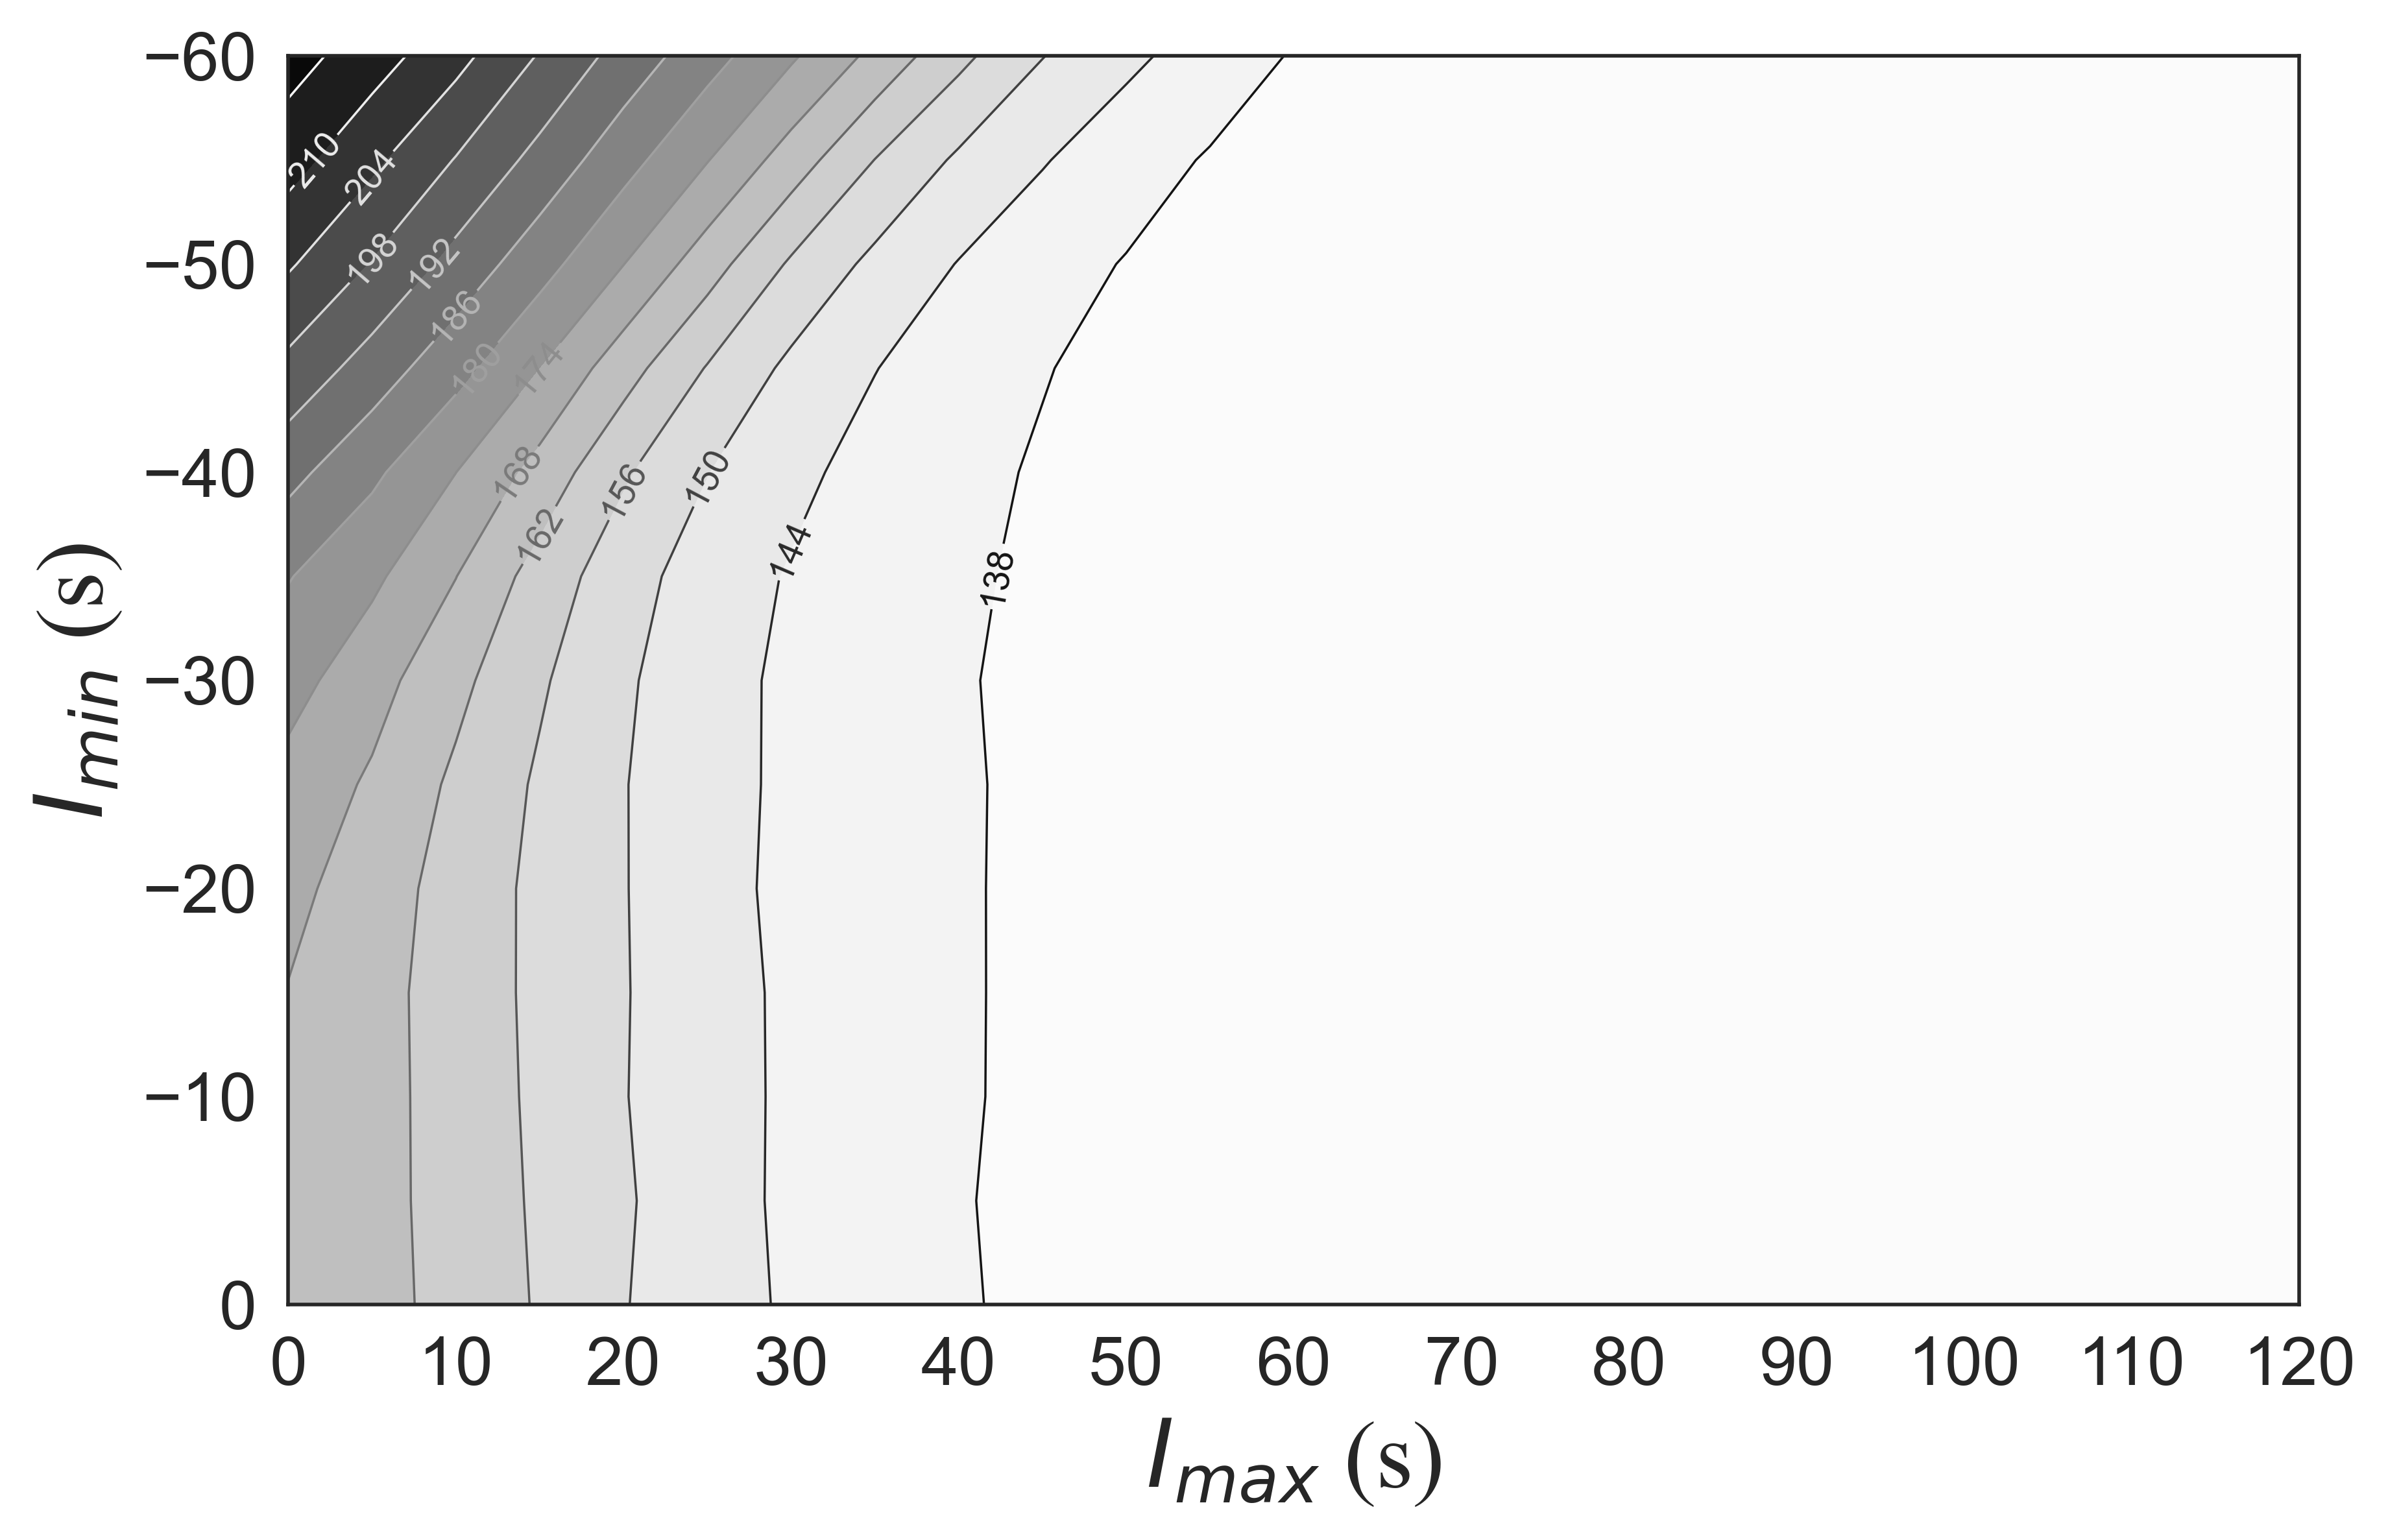

In [18]:
fig = plt.figure(figsize=(8,5),dpi=500)
font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 21,
}
sns.set_style('white',{'grid.color': 'black','grid.linestyle': '-'})
ax = plt.subplot()
ax.grid(True)  # 显示网格
plt.xlim(0,100)
plt.ylim(0,-60)
plt.xlabel('$I_{max}$ (s)',font)
plt.ylabel('$I_{min}$ (s)',font)

x = np.arange(0,121,5)
y = np.arange(-60,1,5)
X,Y = np.meshgrid(x,y)
Z = df_3.iloc[0:13,0:25]

x_ticks = np.arange(120, -5, -10)
y_ticks = np.arange(-60, 1, 10)
plt.xticks(x_ticks,size=15)
plt.yticks(y_ticks,size=15)

plt.contourf(X,Y,Z,cmap=cm.Greys,levels=15)
#画等高线
C = plt.contour(X,Y,Z,cmap=cm.Greys_r,linewidths=0.5,levels=15)
plt.clabel(C, inline=True, fontsize=8)

plt.show()

In [9]:
Z

0           5          10          15          20          25  \
 0   218.494484  212.739226  205.918729  197.553601  189.709732  182.418612   
-5   212.362430  205.228723  197.687919  190.091189  182.262148  174.243724   
-10  204.706826  197.562974  189.971582  182.357598  174.091917  164.716582   
-15  196.385427  189.282436  182.004601  173.943411  164.505650  155.633514   
-20  187.884632  181.198995  174.041272  165.823751  156.746439  150.114398   
-25  180.323766  175.208695  168.103373  159.513104  152.411578  147.134814   
-30  176.206442  170.251155  163.581225  156.765953  150.843938  146.211646   
-35  172.027841  167.124262  160.899529  155.184213  150.247456  146.117623   
-40  169.616725  164.962812  159.594664  154.591961  150.270869  145.930541   
-45  167.772985  163.911449  159.541163  154.595586  150.335200  146.337382   
-50  166.950850  163.961778  159.650538  154.809137  150.238371  146.311398   
-55  167.381754  164.074556  159.587038  155.170938  150.667778  146.456160   
-60  167.748604  164.272200  159.803128  155.479114  150.269642  146.651418   

             30          35          40          45          50          55  \
 0   174.830771  166.392844  157.569327  150.168827  145.303575  141.310404   
-5   165.184645  155.897900  149.018941  144.400897  140.503027  137.490716   
-10  155.180458  148.482162  143.753916  140.189627  137.698262  136.234497   
-15  148.640681  144.154442  140.844540  138.201434  136.820134  136.301297   
-20  145.432284  141.903679  138.988490  137.606865  136.808156  136.688848   
-25  143.502603  140.244668  138.542203  137.348201  136.973791  136.773187   
-30  142.800899  140.336651  138.361018  136.959831  136.803890  136.895122   
-35  142.813834  140.453599  138.340409  137.348024  136.957396  136.927706   
-40  142.655457  140.275040  138.371836  137.230802  136.915448  136.716297   
-45  142.927665  140.337084  138.343128  137.294734  136.957131  136.954328   
-50  142.989417  140.189965  138.396470  137.152908  137.127952  136.826412   
-55  142.867408  140.221138  138.177854  137.330464  136.823414  136.679407   
-60  143.156367  140.216337  138.304294  137.298663  136.875297  136.714073   

             60  
 0   137.550306  
-5   135.983113  
-10  135.906562  
-15  136.252697  
-20  136.444595  
-25  136.693887  
-30  136.605980  
-35  136.837677  
-40  136.846762  
-45  136.601339  
-50  136.730626  
-55  136.793783  
-60  136.599572

In [89]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "SensitivityAnalysis_U-AWT.csv"
path = path_name + file_name
df_U_AWT = pd.read_csv(path,index_col=0)
file_name = "SensitivityAnalysis_U-PBR.csv"
path = path_name + file_name
df_U_PBR = pd.read_csv(path,index_col=0)

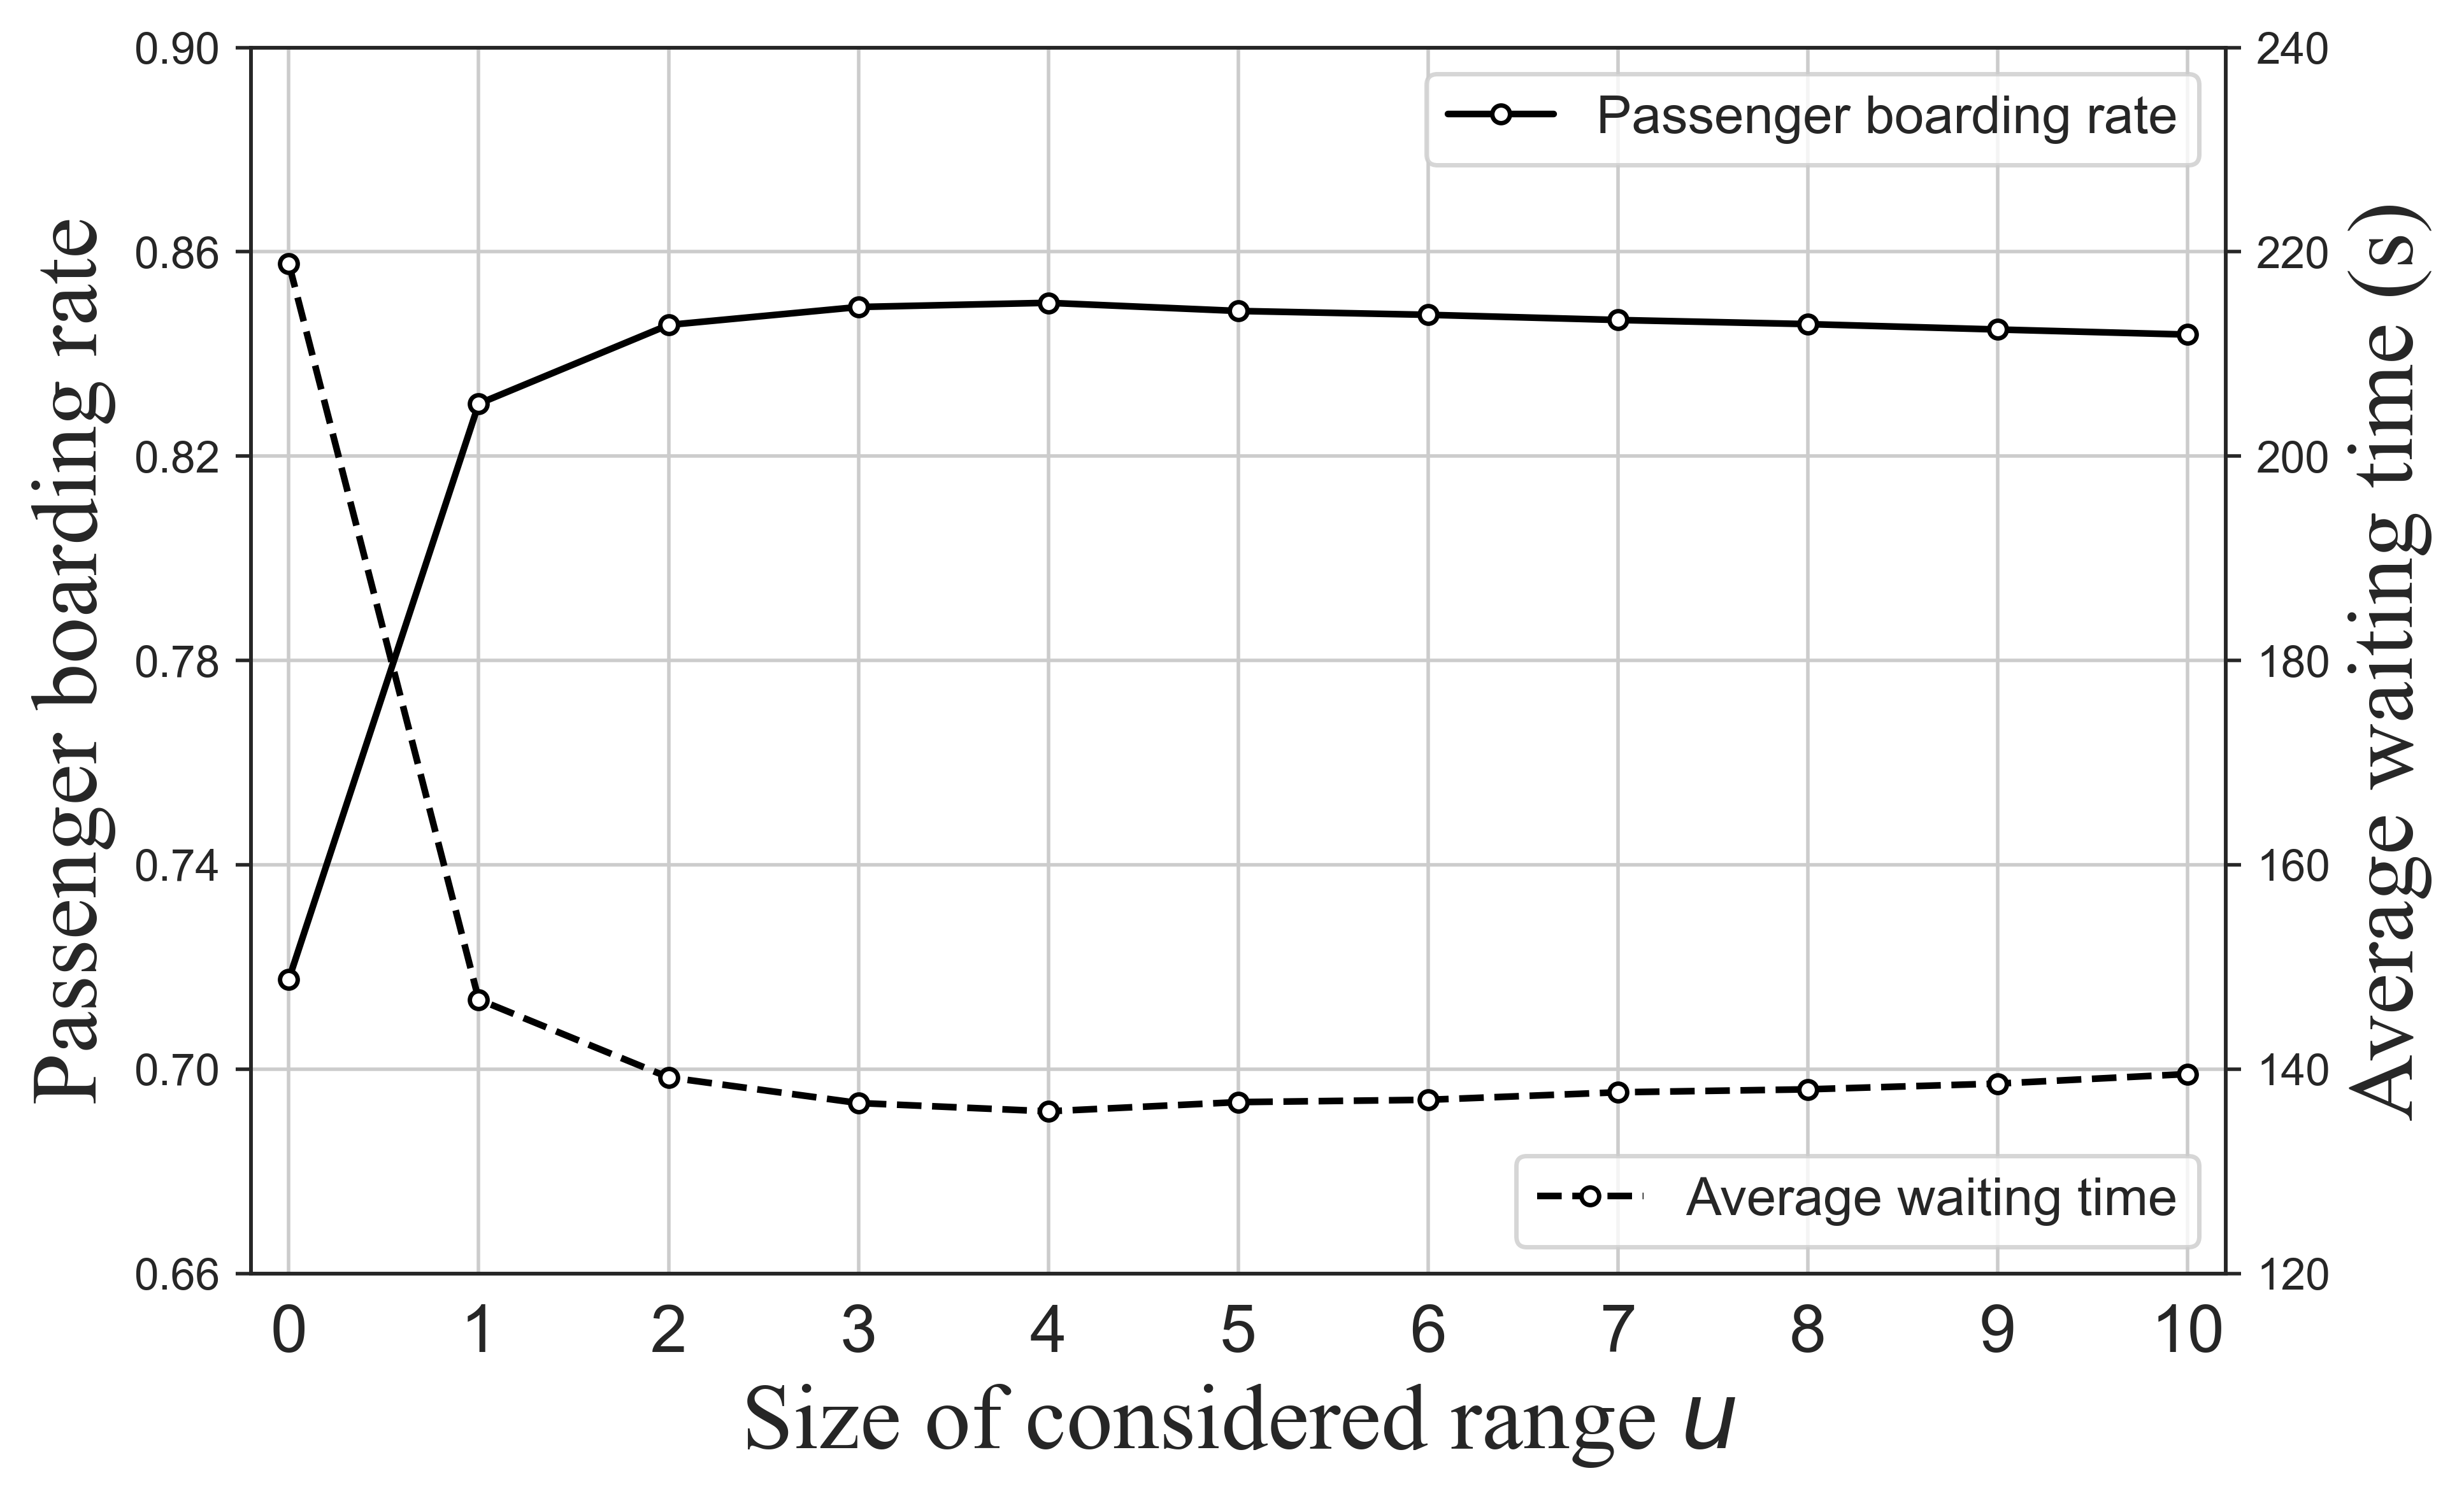

In [160]:
fig = plt.figure(figsize=(8,5),dpi=500)
ax = fig.add_subplot()
sns.set_style('white')
ax.grid(True)  # 显示网格
plt.xlim(-0.2,10.2)
plt.xticks(np.arange(0,11,1),size=15)

ax.set_ylim(0.66,0.90)
ax.set_yticks(np.arange(0.66,0.91,0.04),size=15)
ax.set_xlabel("Size of considered range $u$", font)

ax.plot(np.arange(0, 11), df_U_PBR.iloc[3,:11], linewidth=1.5, color="black", markerfacecolor='white',
         mec='black', marker='o', ms=4, linestyle='-')
ax.set_ylabel("Passenger boarding rate", font)

ax2 = ax.twinx()
ax2.set_ylim(120,240)
ax2.set_yticks(np.arange(120,241, 20),size = 15)
ax2.plot(np.arange(0, 11), df_U_AWT.iloc[3,:11], linewidth=1.5, color="black", markerfacecolor='white',
         mec='black', marker='o', ms=4, linestyle='--')
ax2.set_ylabel("Average waiting time (s)", font)

ax.legend(labels = ["Passenger boarding rate"],loc="upper right",fontsize = 12)
ax2.legend(labels = ["Average waiting time"],loc="lower right",fontsize = 12)

plt.show()  # 显示图片

In [161]:
path_name = "D:\\PlotData1012\\Result\\"
file_name = "Runtime_Average.csv"
path = path_name + file_name
df_runtime = pd.read_csv(path,index_col=0)
df_runtime

10     20     30     40     50     60     70     80     90    100  \
AVG                                                                         
10   0.070  0.080  0.090  0.093  0.096  0.098  0.101  0.104  0.106  0.107   
20   0.140  0.175  0.182  0.188  0.192  0.198  0.199  0.199  0.202  0.205   
30   0.167  0.203  0.219  0.227  0.231  0.238  0.240  0.240  0.240  0.243   
40   0.183  0.229  0.240  0.249  0.256  0.257  0.260  0.261  0.263  0.264   
50   0.200  0.238  0.257  0.262  0.264  0.268  0.273  0.273  0.274  0.277   
60   0.207  0.244  0.265  0.270  0.276  0.278  0.279  0.282  0.286  0.286   
70   0.206  0.261  0.268  0.275  0.281  0.283  0.286  0.287  0.290  0.290   
80   0.231  0.260  0.271  0.281  0.282  0.289  0.293  0.295  0.294  0.296   
90   0.228  0.273  0.280  0.291  0.292  0.297  0.298  0.297  0.299  0.300   
100  0.266  0.269  0.286  0.292  0.297  0.299  0.301  0.302  0.302  0.304   

       110    120    130    140    150    160    170    180    190    200  
AVG                                                                        
10   0.108  0.109  0.112  0.113  0.115  0.116  0.118  0.119  0.121  0.122  
20   0.205  0.206  0.208  0.208  0.210  0.210  0.211  0.212  0.214  0.215  
30   0.243  0.246  0.246  0.249  0.248  0.249  0.249  0.250  0.252  0.253  
40   0.265  0.268  0.267  0.267  0.268  0.270  0.271  0.272  0.273  0.272  
50   0.278  0.280  0.280  0.280  0.282  0.284  0.284  0.283  0.285  0.285  
60   0.287  0.289  0.288  0.290  0.291  0.292  0.293  0.294  0.291  0.293  
70   0.292  0.293  0.295  0.294  0.295  0.296  0.296  0.296  0.298  0.298  
80   0.297  0.297  0.299  0.300  0.301  0.301  0.301  0.303  0.303  0.303  
90   0.301  0.303  0.304  0.305  0.306  0.306  0.305  0.306  0.306  0.307  
100  0.305  0.305  0.306  0.307  0.307  0.308  0.310  0.309  0.310  0.311

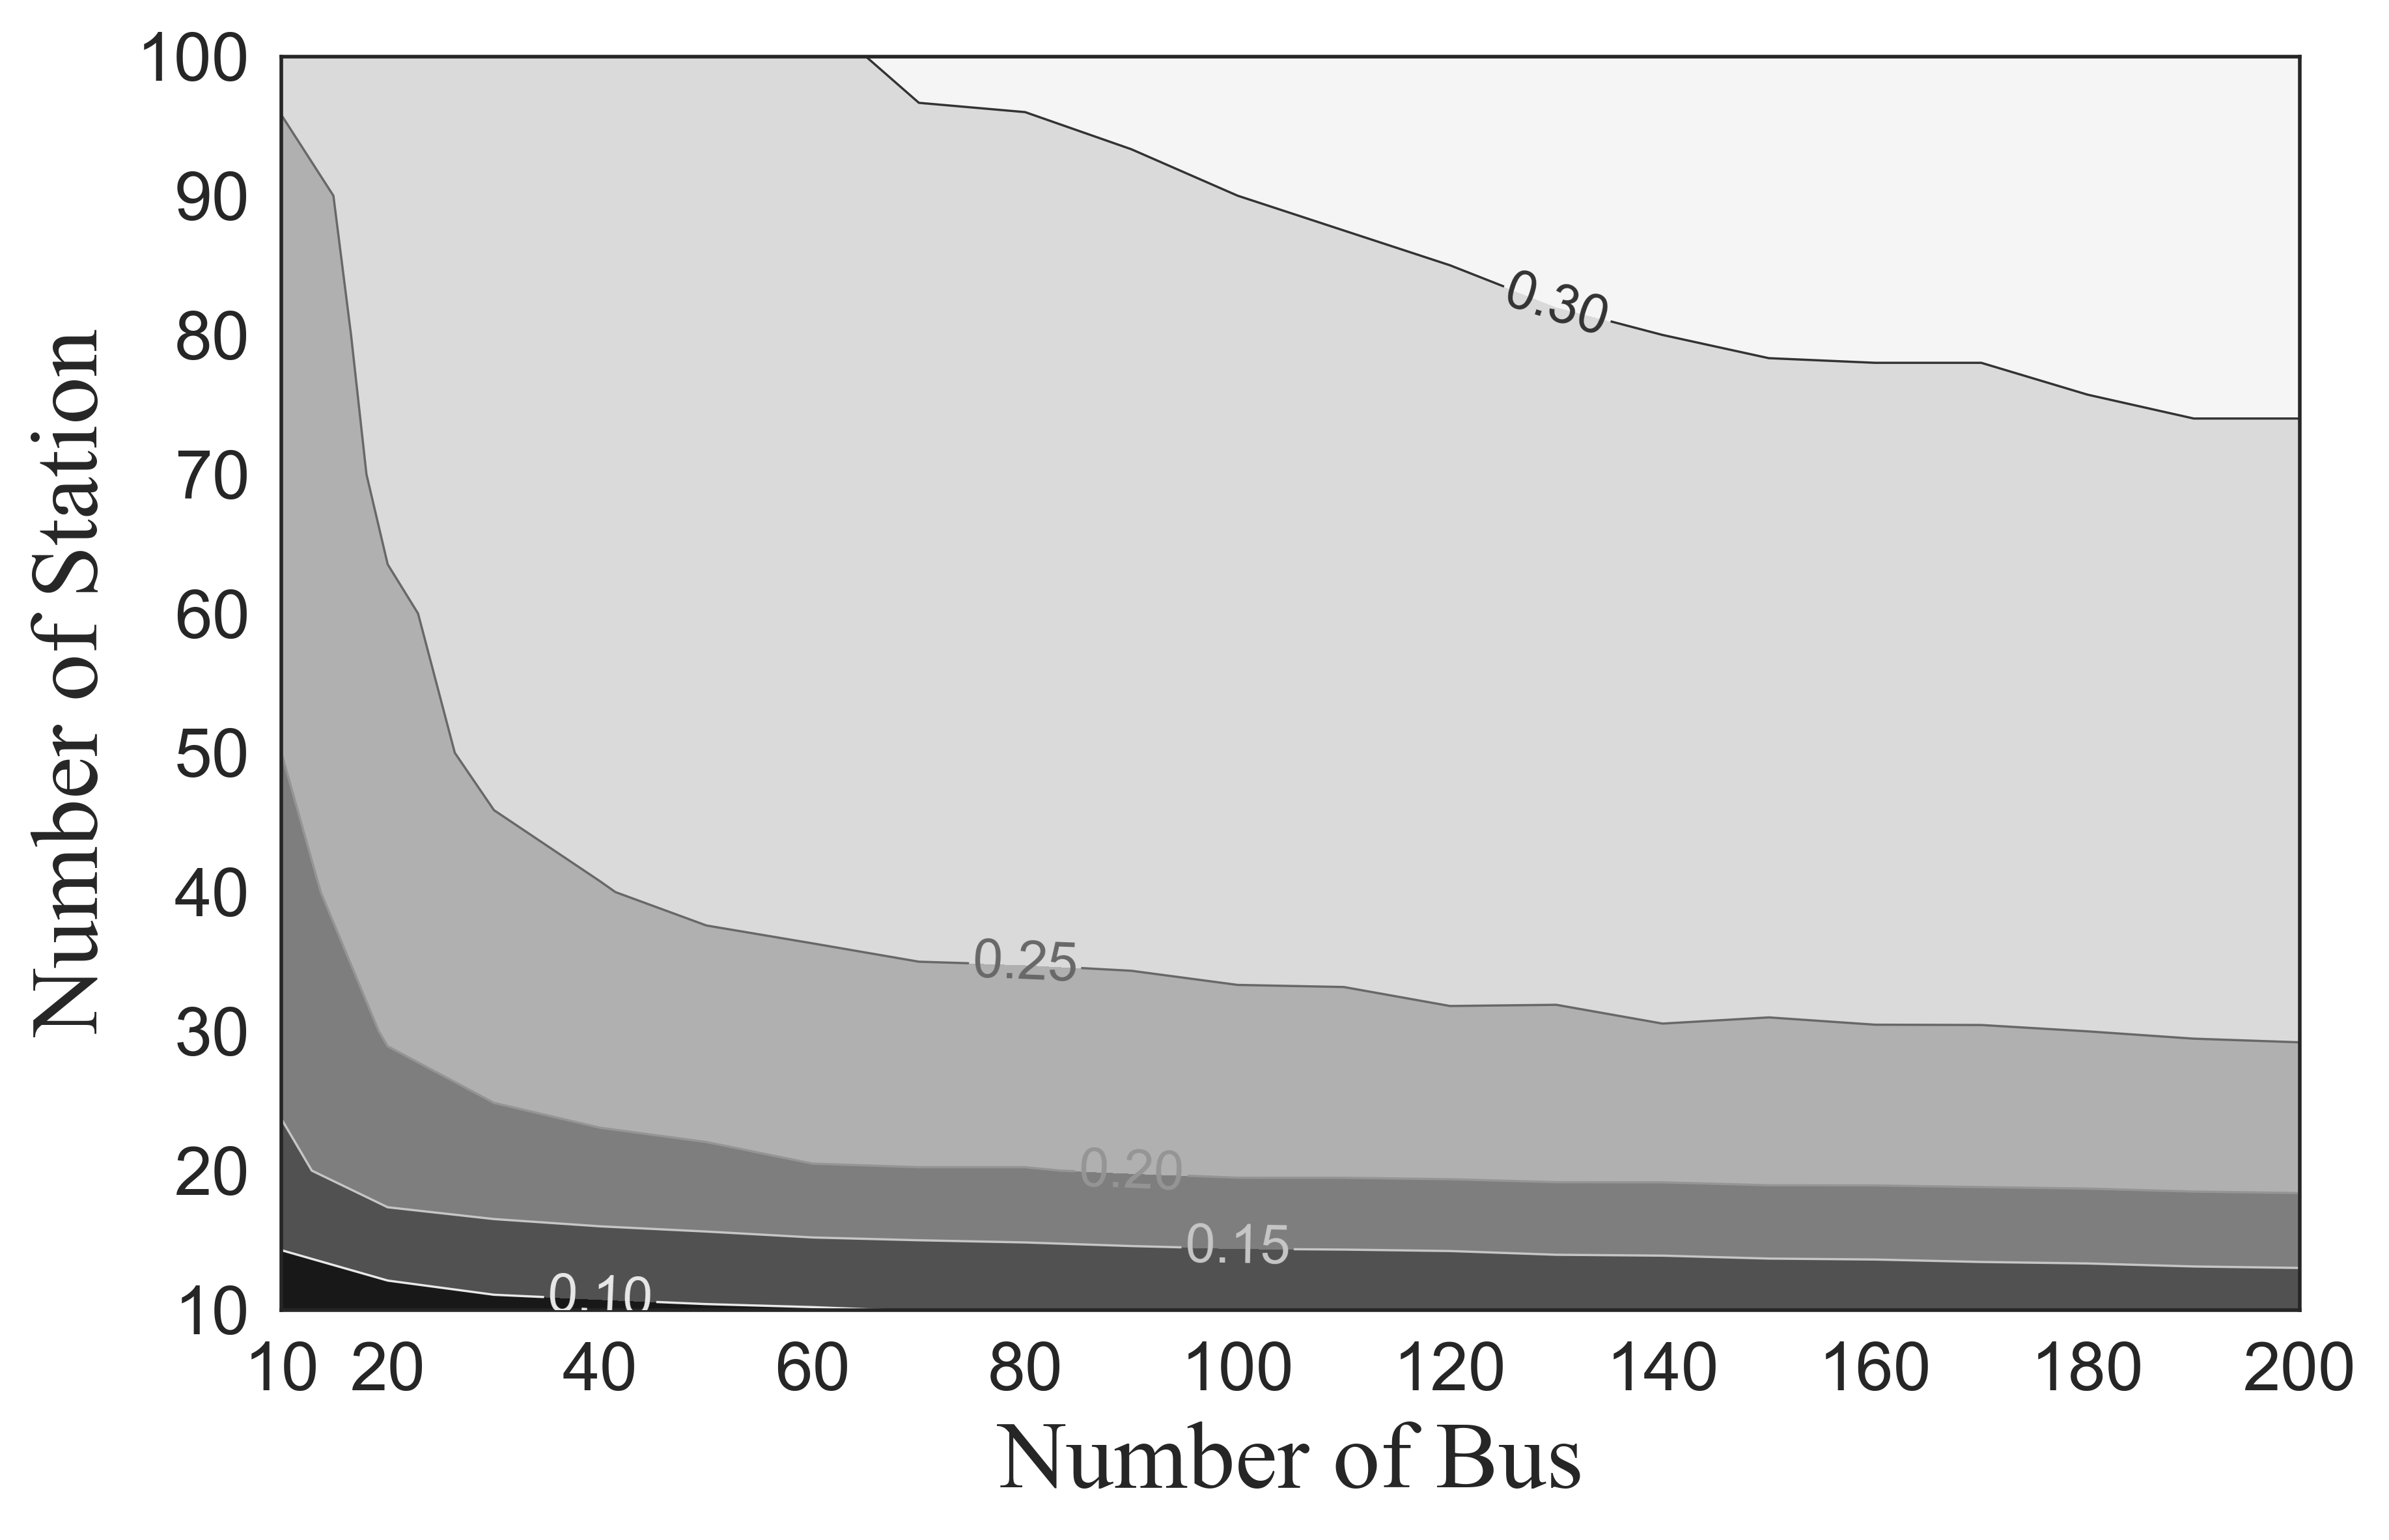

In [165]:
fig = plt.figure(figsize=(8,5),dpi=500)
sns.set_style('white')
plt.grid(True)
plt.xlim(10,200)
plt.ylim(10,100)

plt.xlabel('Number of Bus',font)
plt.ylabel('Number of Station',font)

X = np.arange(1, 21, 1) * 10
Y = np.arange(1, 11, 1) * 10
X, Y = np.meshgrid(X, Y)
Z = np.array(df_runtime)

plt.contourf(X,Y,Z,cmap=cm.Greys_r, levels = 5)
C = plt.contour(X,Y,Z,cmap=cm.Greys,linewidths=0.5,levels=5)
plt.clabel(C, inline=True, fontsize=12)

x_ticks = np.array([10,20,40,60,80,100,120,140,160,180,200])
plt.xticks(x_ticks,size=15)
y_ticks = np.arange(10, 101, 10)
plt.yticks(y_ticks,size=15)

plt.show()